# IF3170 Artificial Intelligence | Tugas Besar 2

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks, markdown blocks, or new sections if needed.


Group Number: 02

Group Members:
- Maulana Muhamad Susetyo (13522127)
- Andi Marihot Sitorus (13522138)
- Muhammad Dzaki Arta (13522149)
- Muhammad Rasheed Qais Tandjung (13522158)

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, log_loss
import pickle


# Import other libraries if needed

## Import Dataset

In [ ]:
# Example of reading a csv file from a gdrive link

# Take the file id from the gdrive file url
# https://drive.google.com/file/d/1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU/view?usp=sharing => The file id is 1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU
# and then put it in this format:
# https://drive.google.com/uc?id={file_id}
# Don't forget to change the access to public

df1 = pd.read_csv('https://drive.google.com/uc?id=19sGRFgQzgy1p8lBGYS-Q3ZbIV2KJ3HPx')
df2 = pd.read_csv('https://drive.google.com/uc?id=1GolqtRPAFGtGCISHzrWSoWSTSOo1mvzk')
df3 = pd.read_csv('https://drive.google.com/uc?id=1MLSQtuMhu6Uj4o63V3R_lwizAmwmq4Ne')
df4 = pd.read_csv('https://drive.google.com/uc?id=1UkULYQYVq4SCAhH6D6XWBm5E1FVmpo-3')
df5 = pd.read_csv('https://drive.google.com/uc?id=1pOzuDFgaAZIHPonobYvn7oHn2omuVPAh')
df6 = pd.read_csv('https://drive.google.com/uc?id=1zC6P2U3NciBegoFHw0gEwrf-b6WDzzCI')


# Exploratory Data Analysis (Optional)

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

In [ ]:
df_array = [df1,df2,df3,df4,df5,df6]

df = reduce(lambda left, right: pd.merge(left, right, on='id', how='outer'), df_array)

Categorical_Columns = ['proto', 'state', 'service', 'attack_cat', 'label','is_ftp_login', 'is_sm_ips_ports', 'swin', 'dwin']
Categorical_Columns +=  ['id']
Numerical_Columns = df.drop(columns=Categorical_Columns).columns.tolist()
Categorical_Columns.remove('id')

print(Categorical_Columns)
print(Numerical_Columns)

df.shape

['proto', 'state', 'service', 'attack_cat', 'label', 'is_ftp_login', 'is_sm_ips_ports', 'swin', 'dwin']
['stcpb', 'dtcpb', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'sload', 'dload', 'spkts', 'dpkts', 'ct_state_ttl', 'ct_flw_http_mthd', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'sjit', 'djit', 'sinpkt', 'dinpkt', 'tcprtt', 'synack', 'ackdat']


(175341, 44)

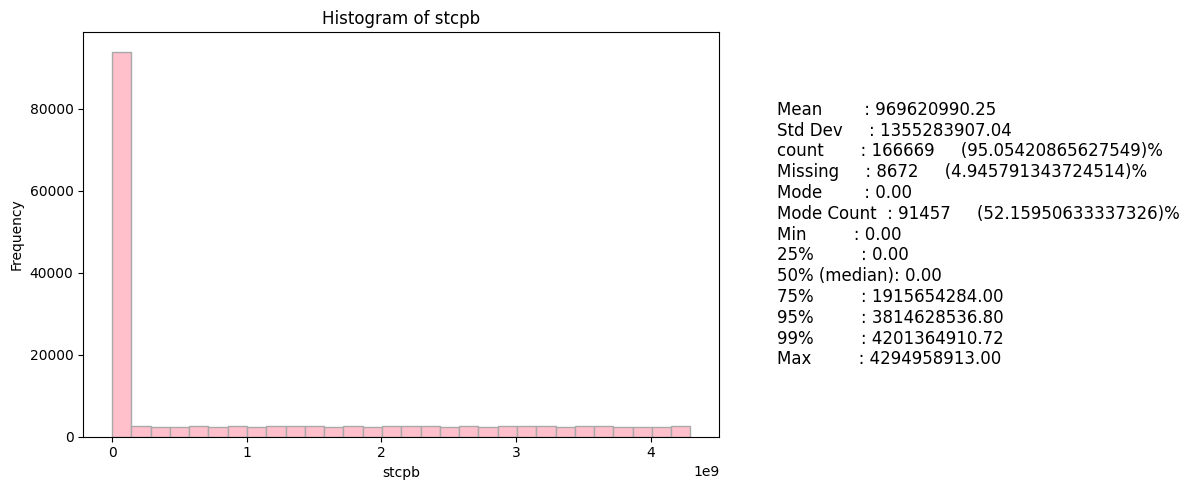

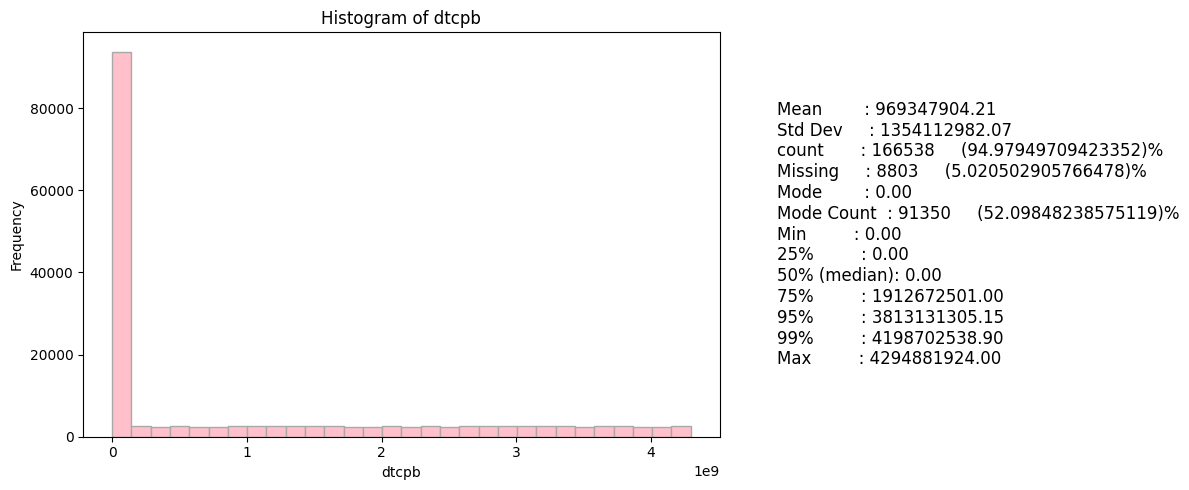

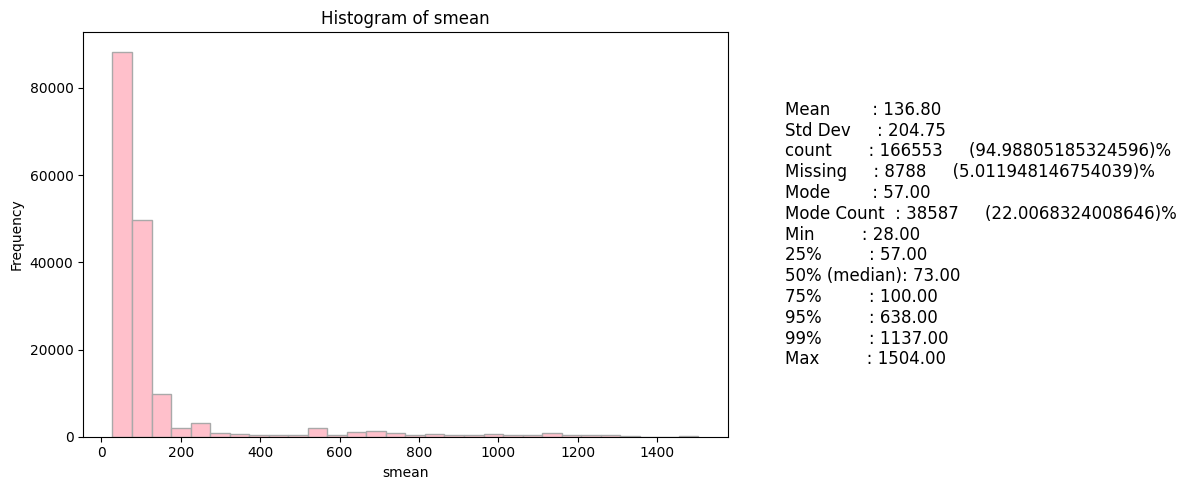

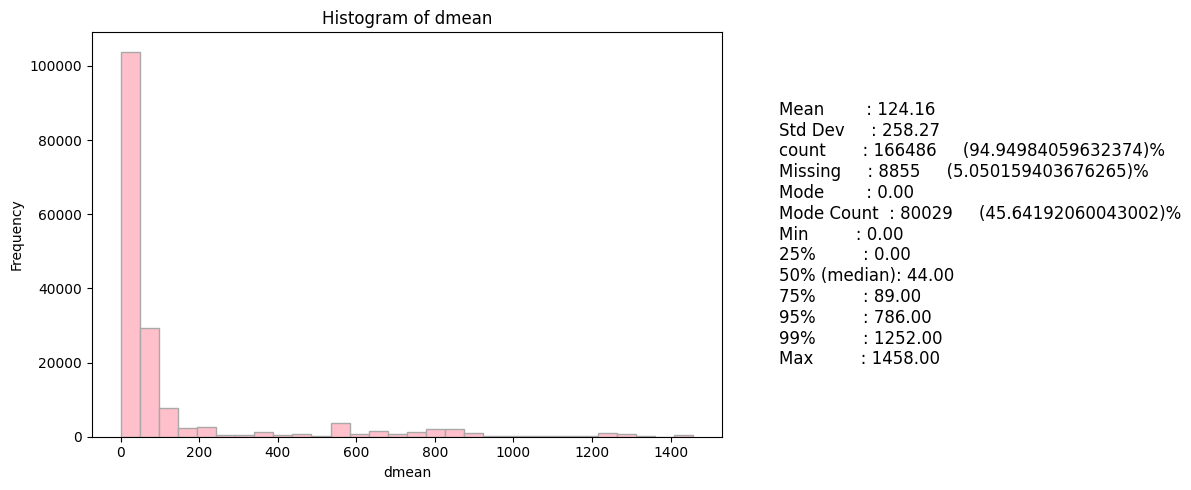

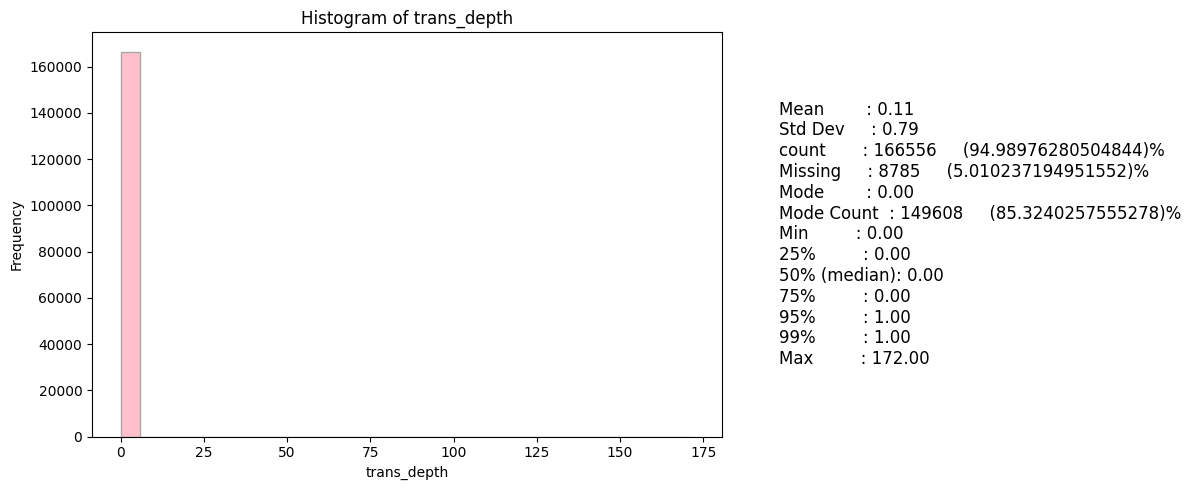

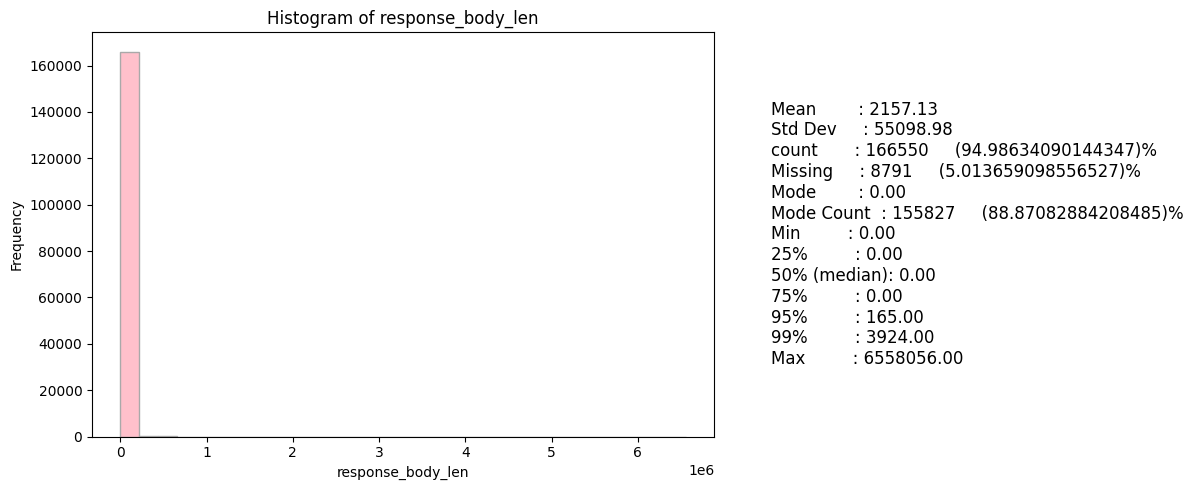

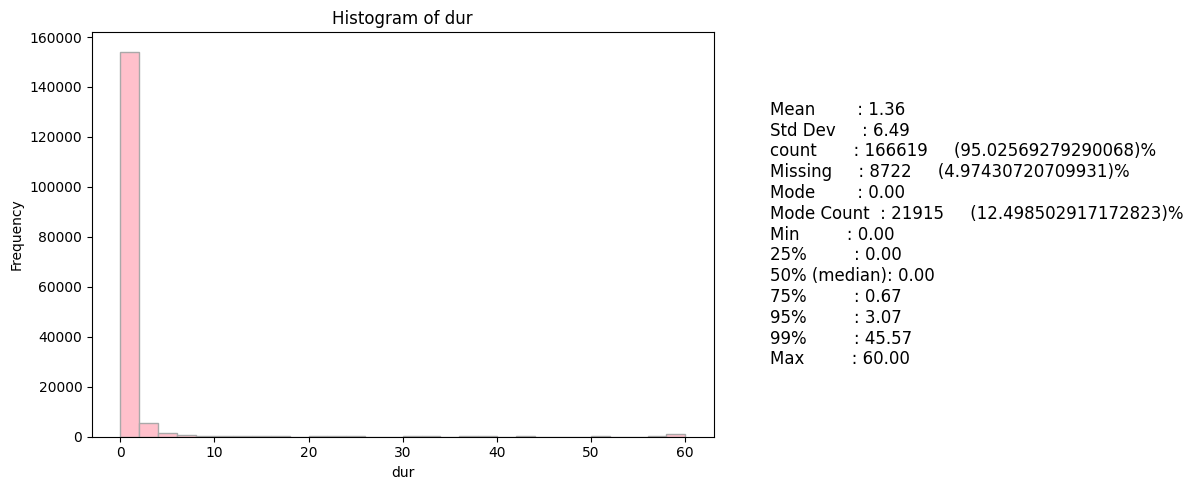

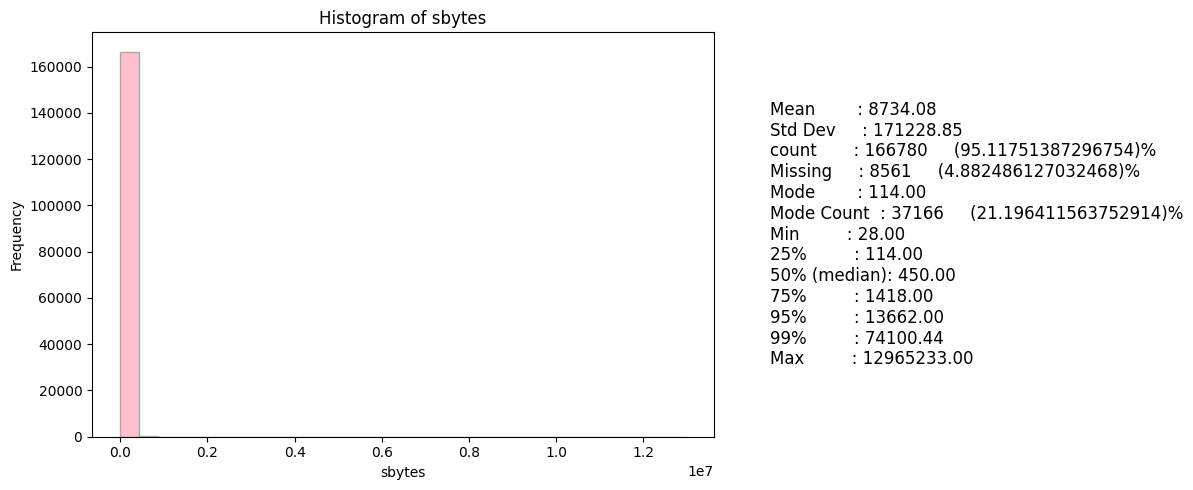

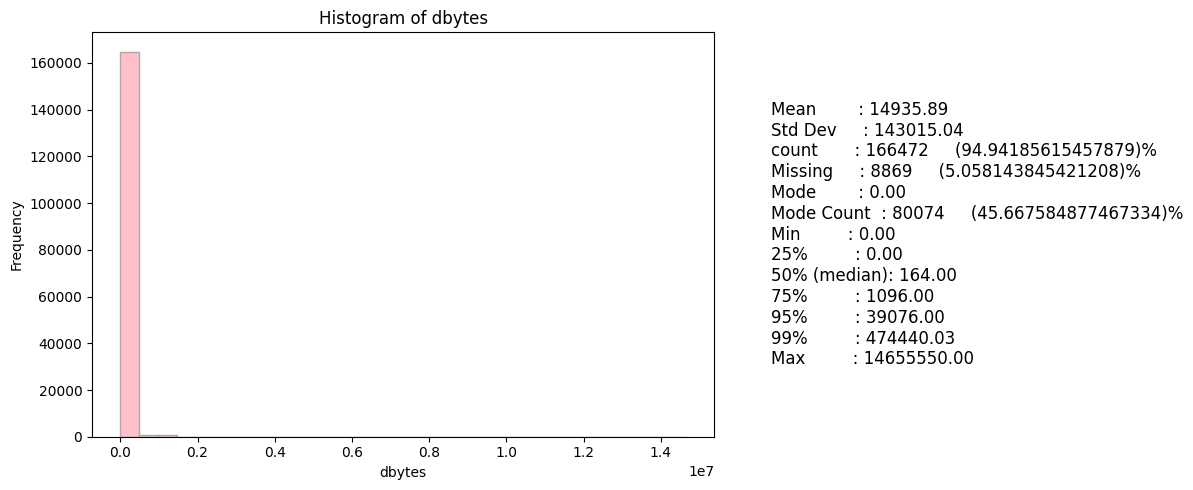

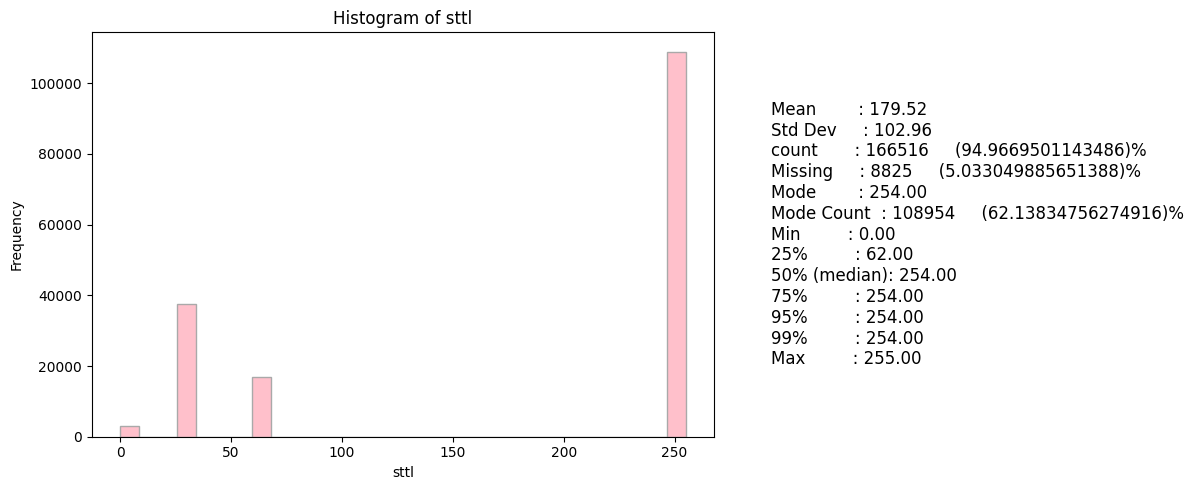

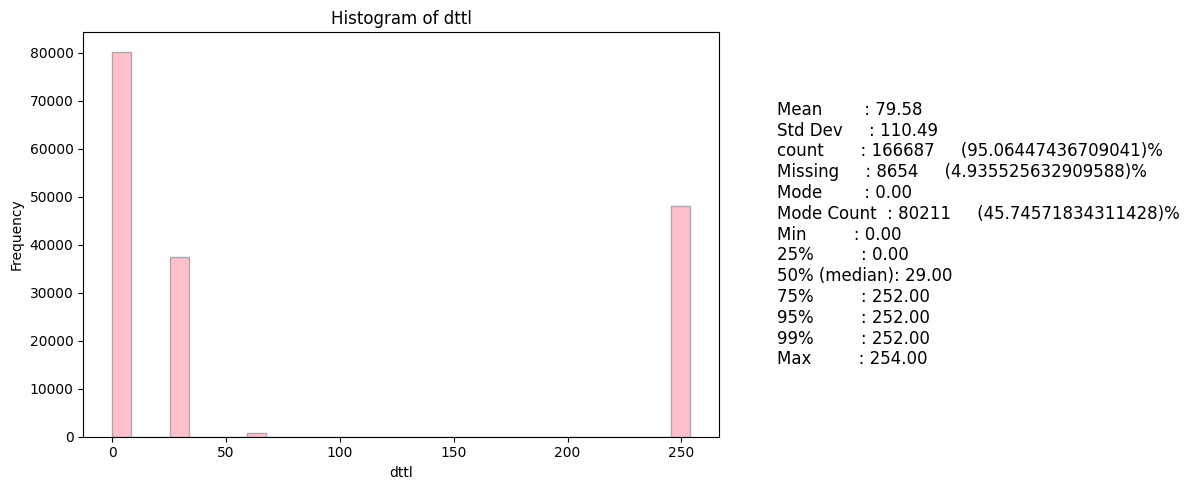

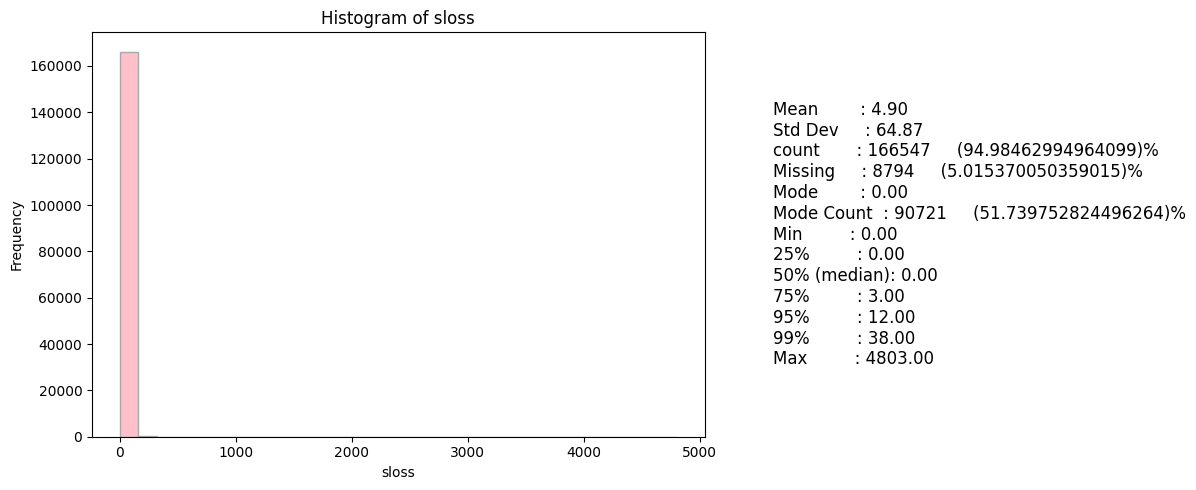

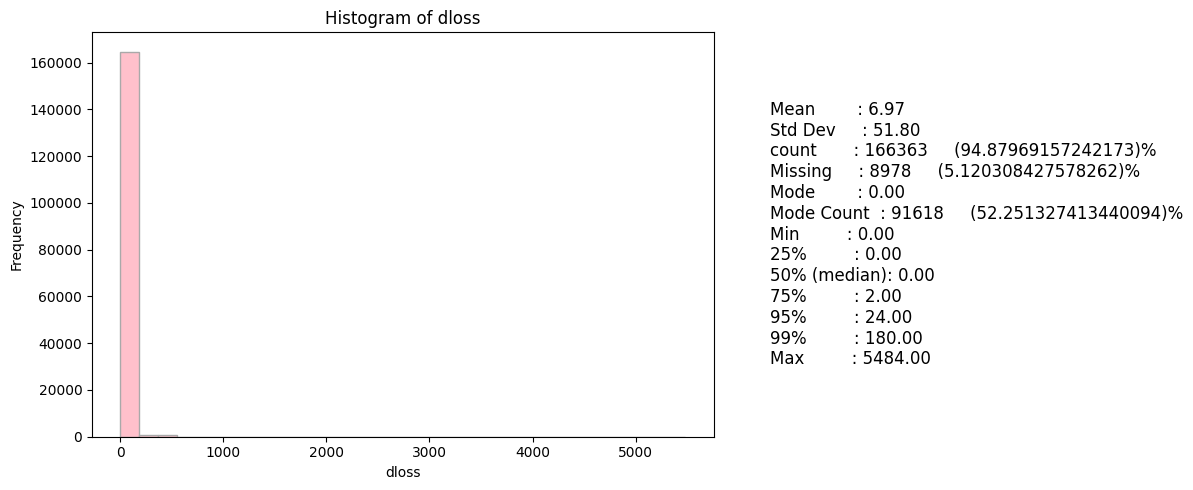

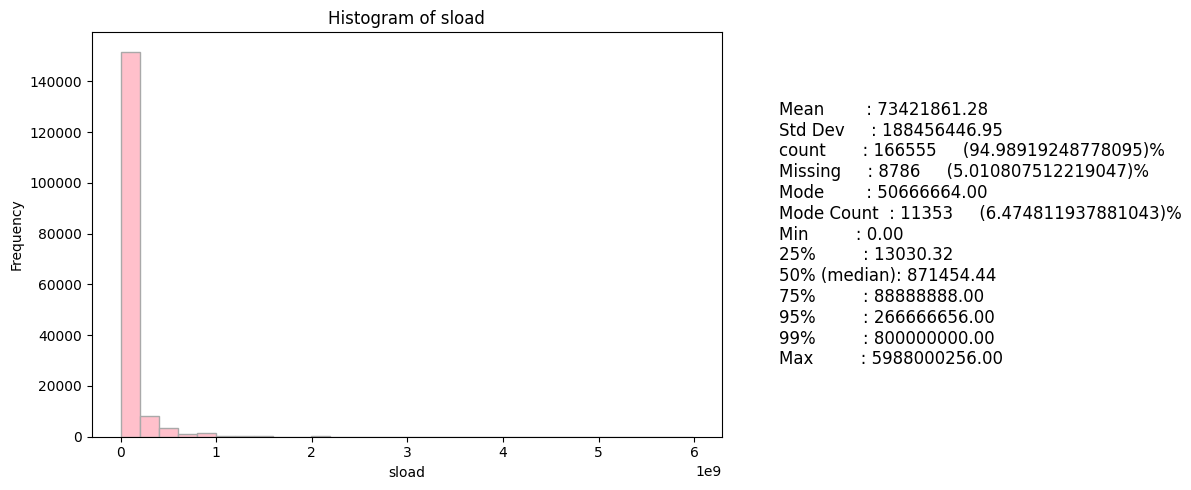

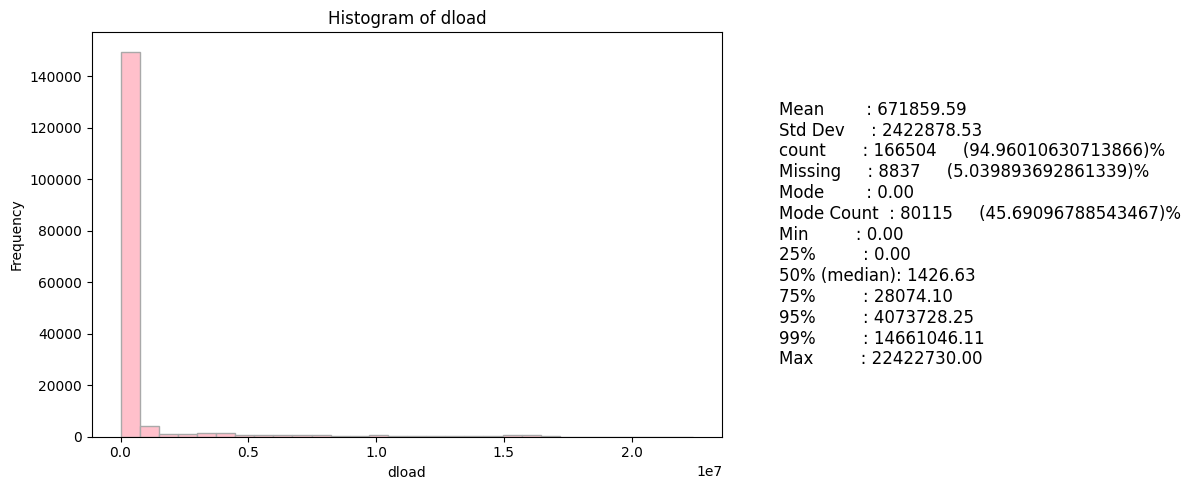

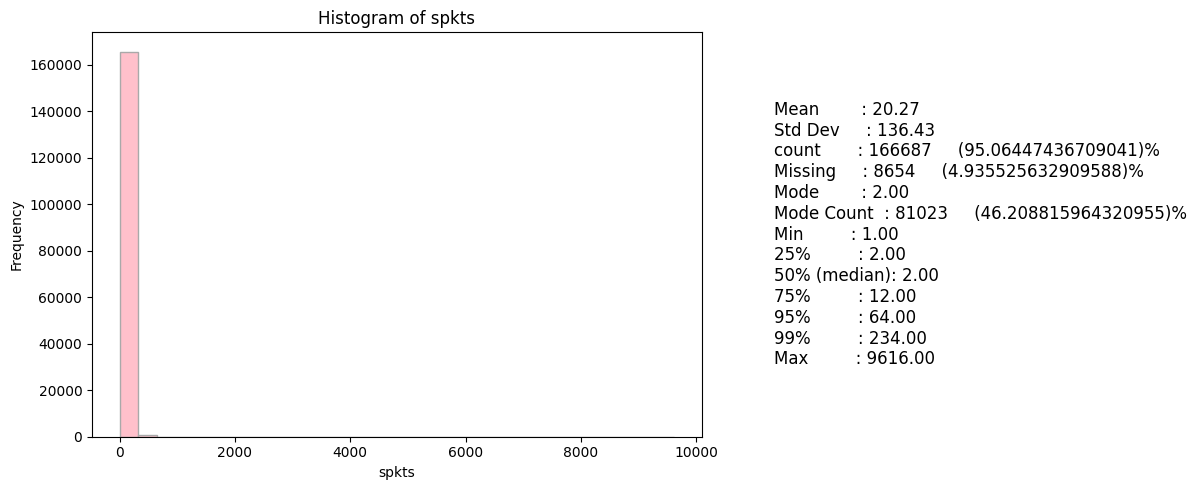

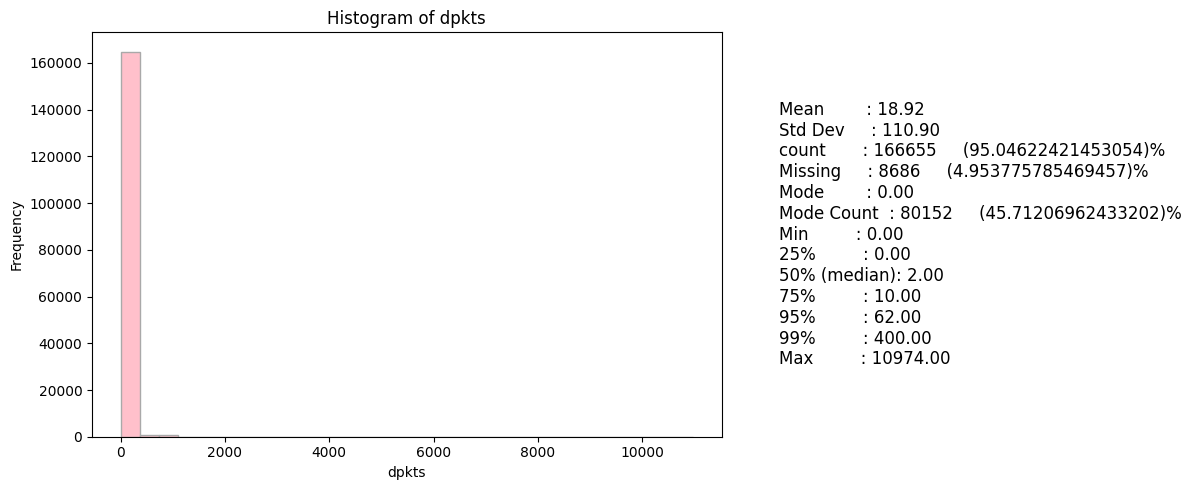

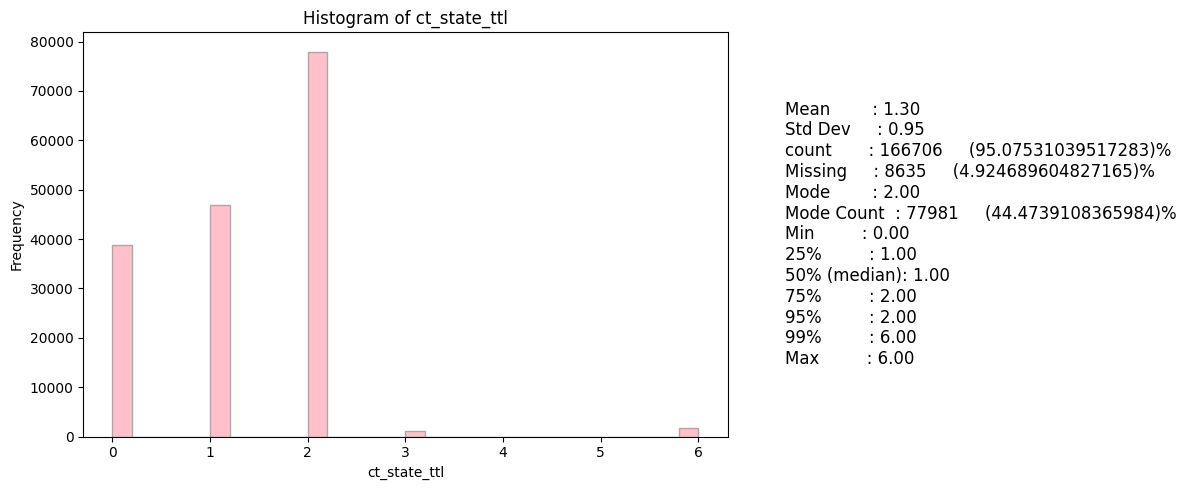

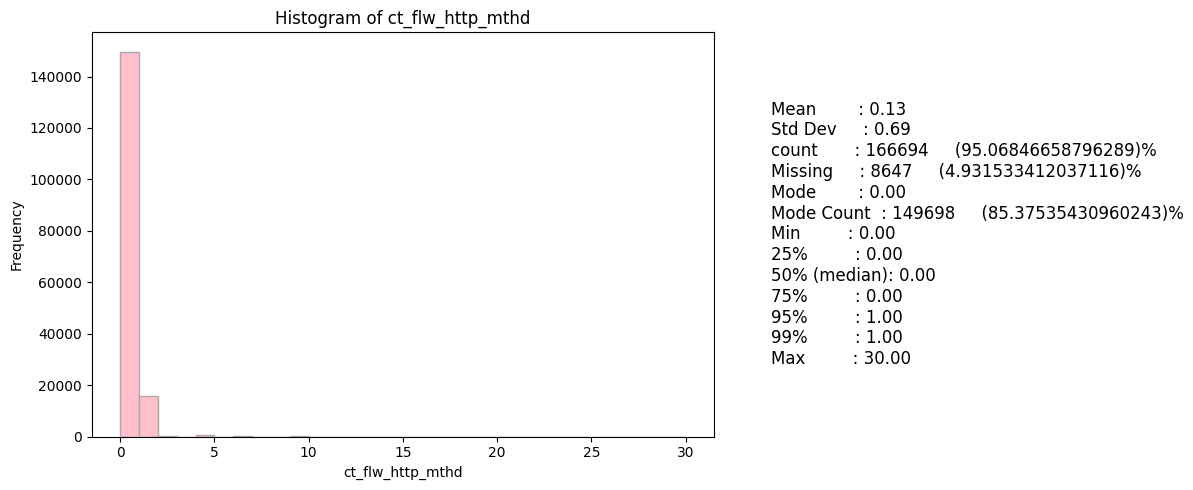

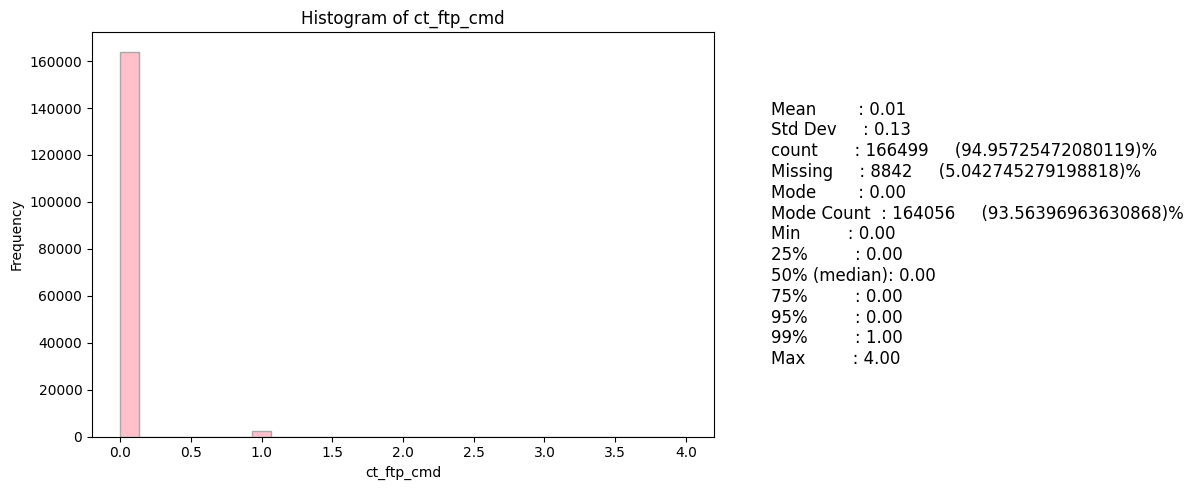

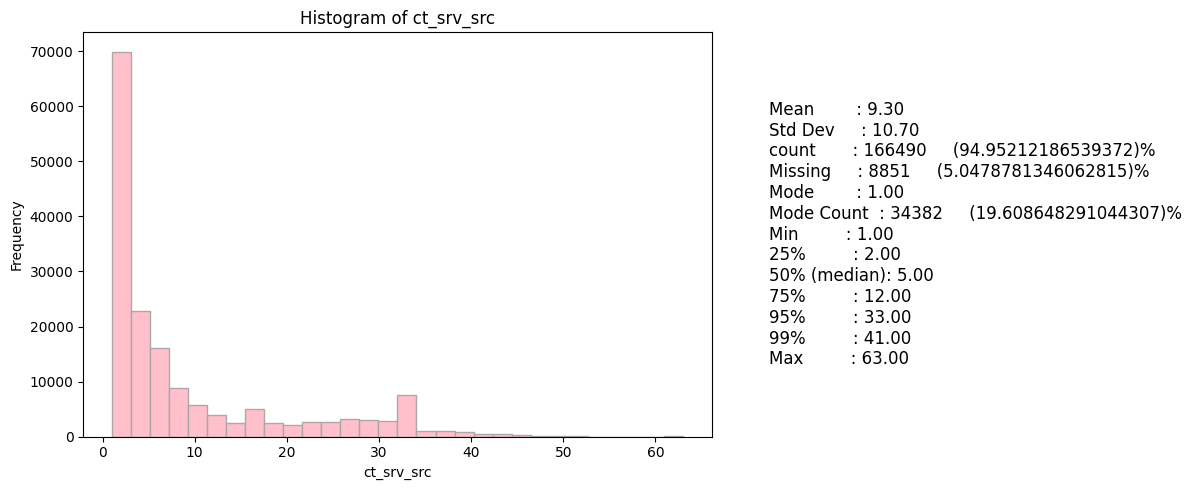

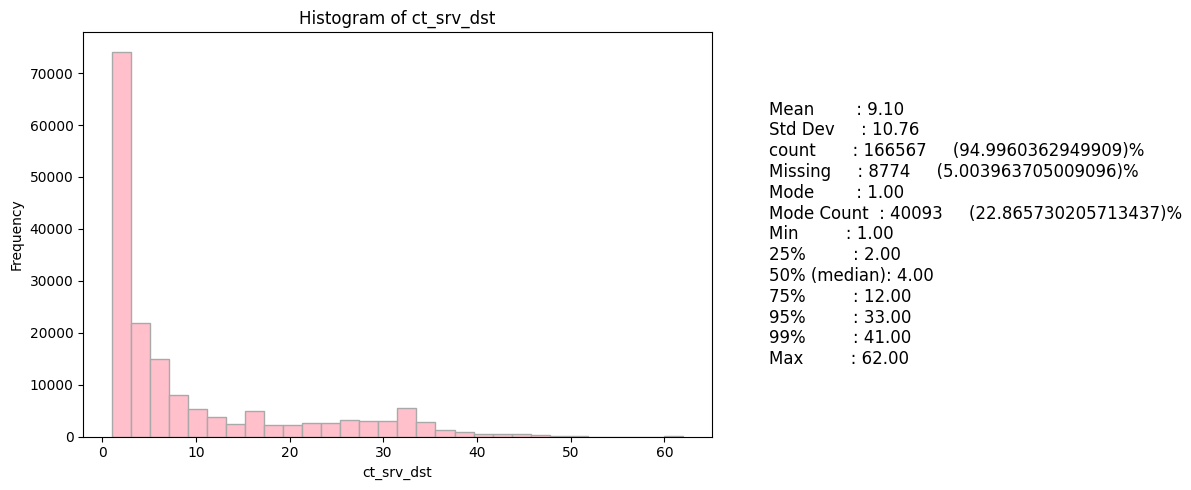

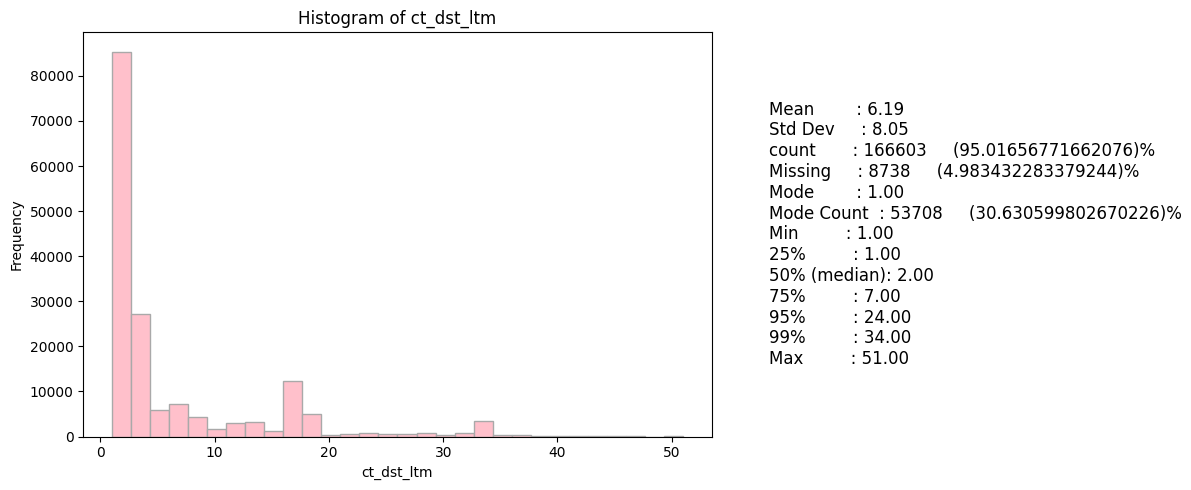

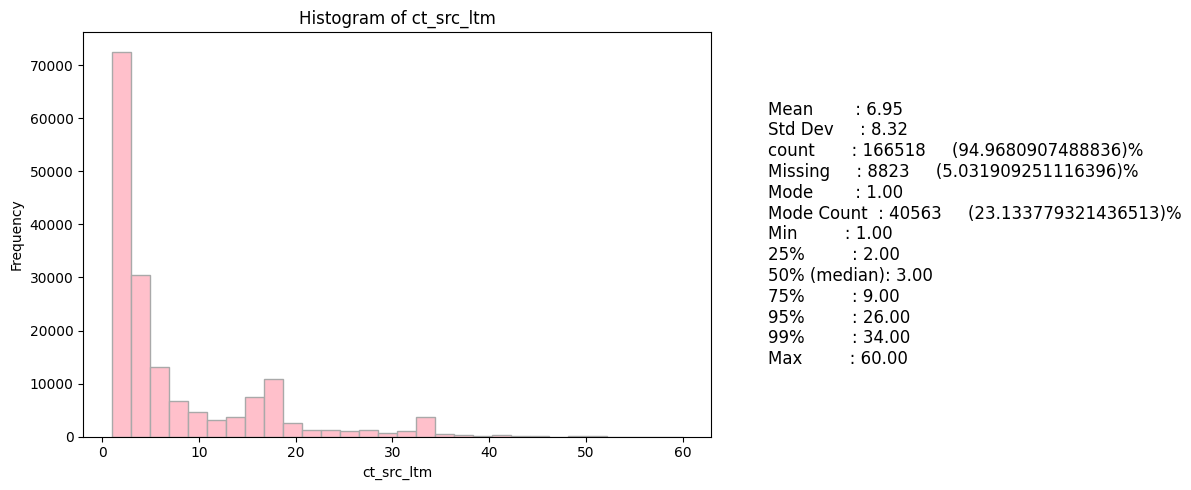

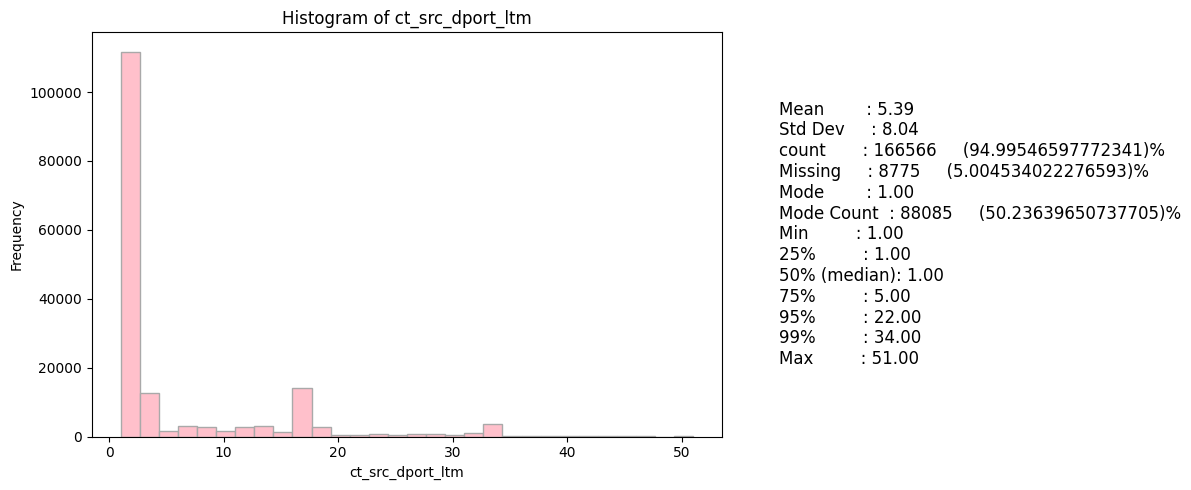

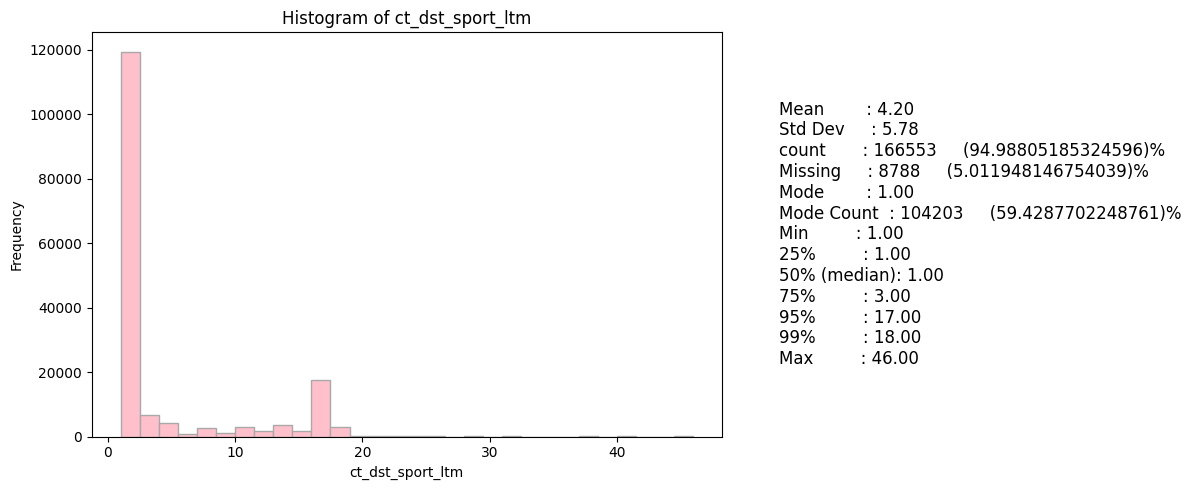

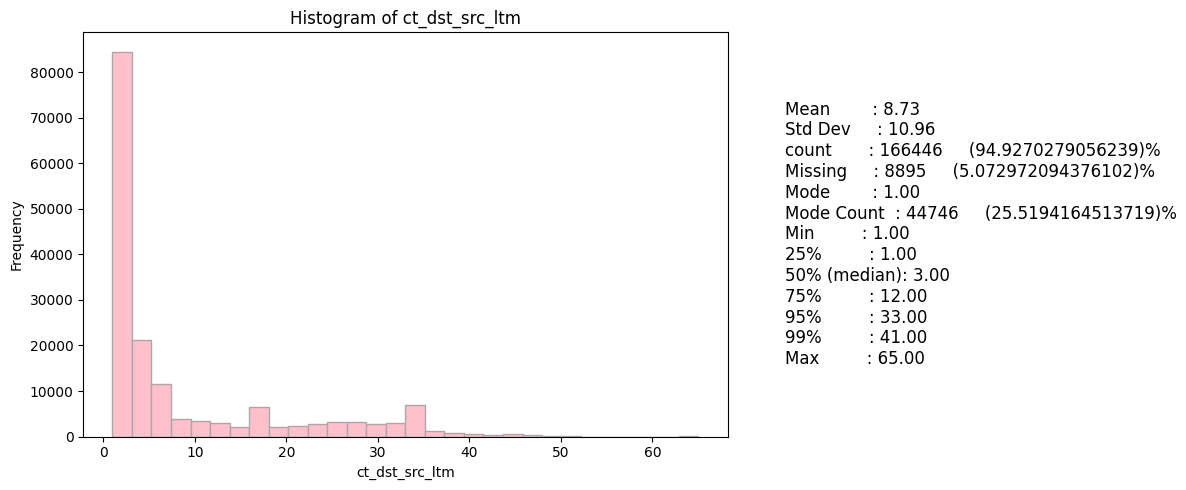

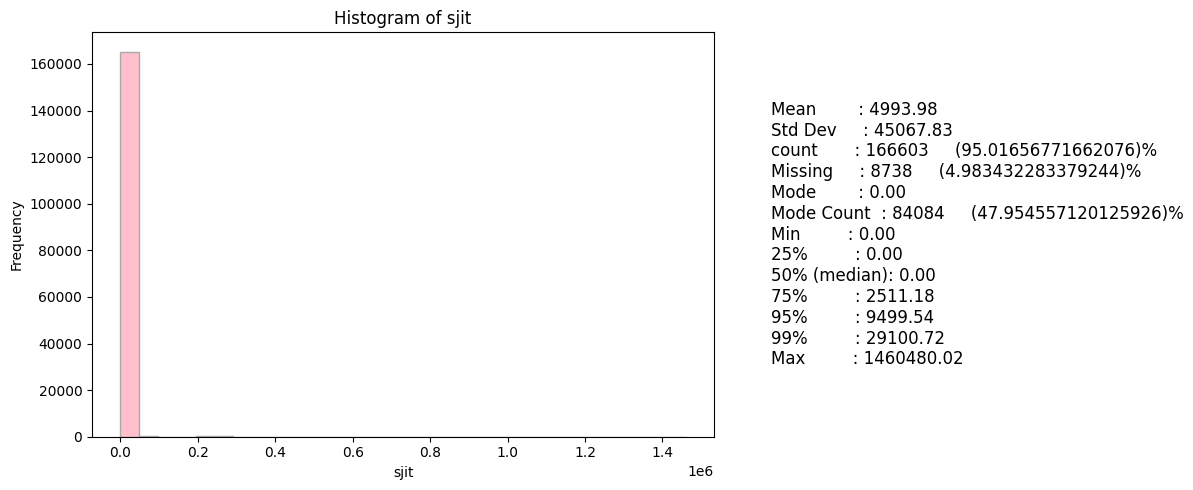

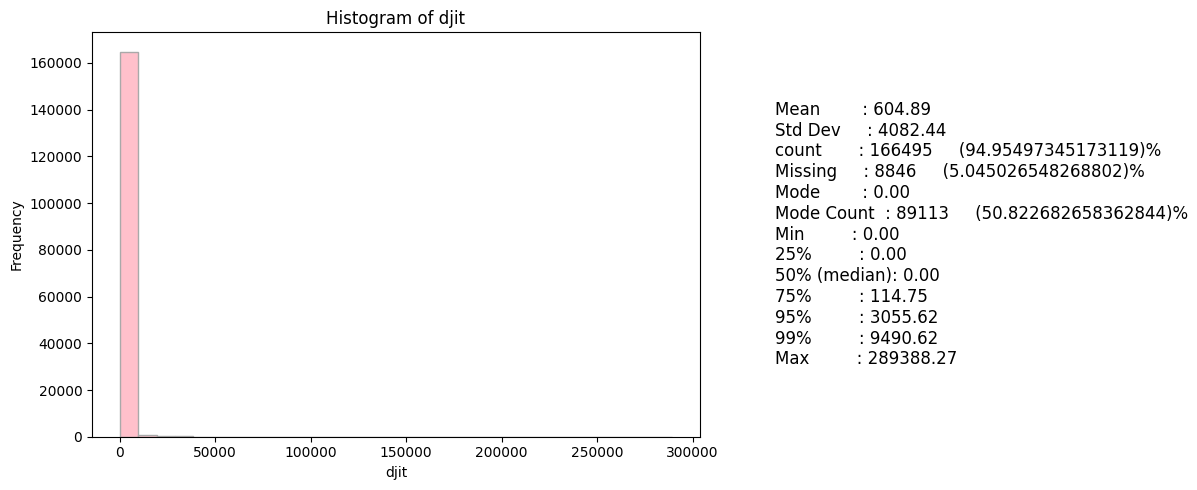

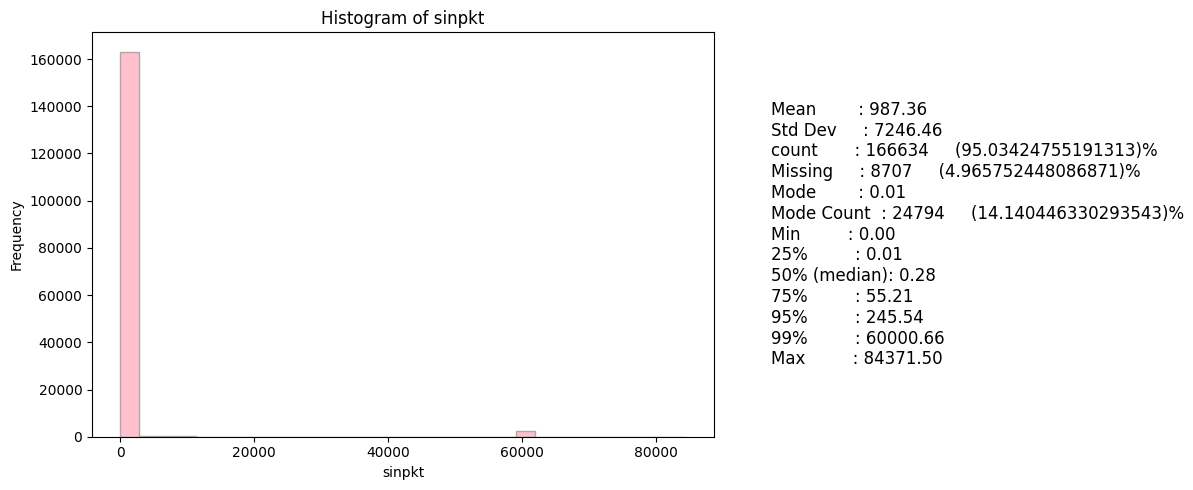

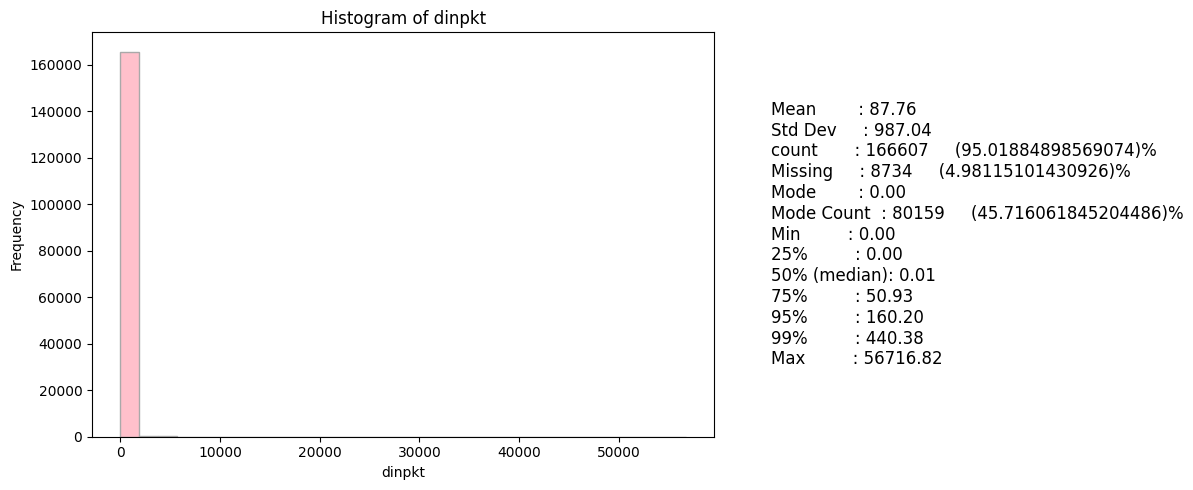

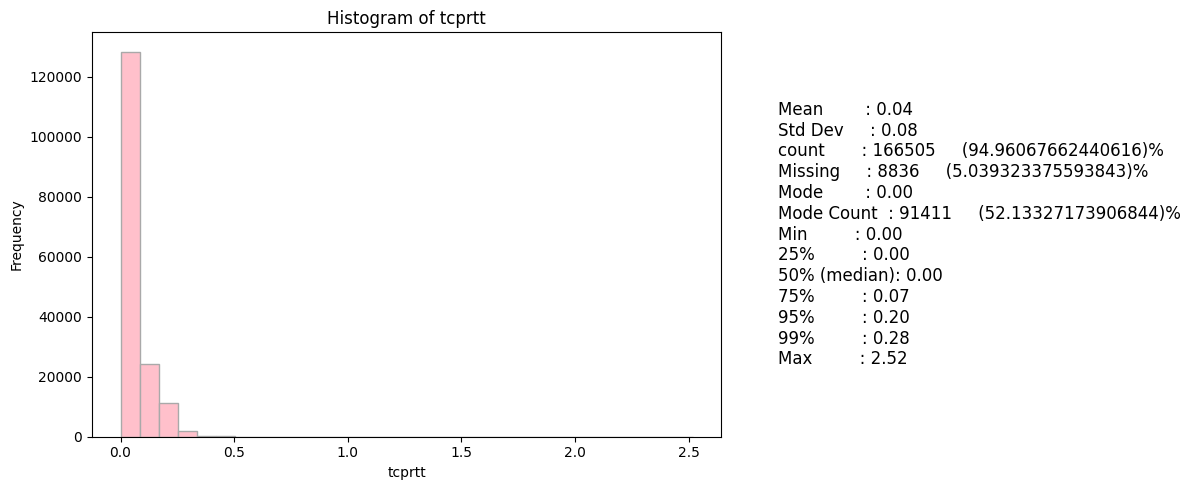

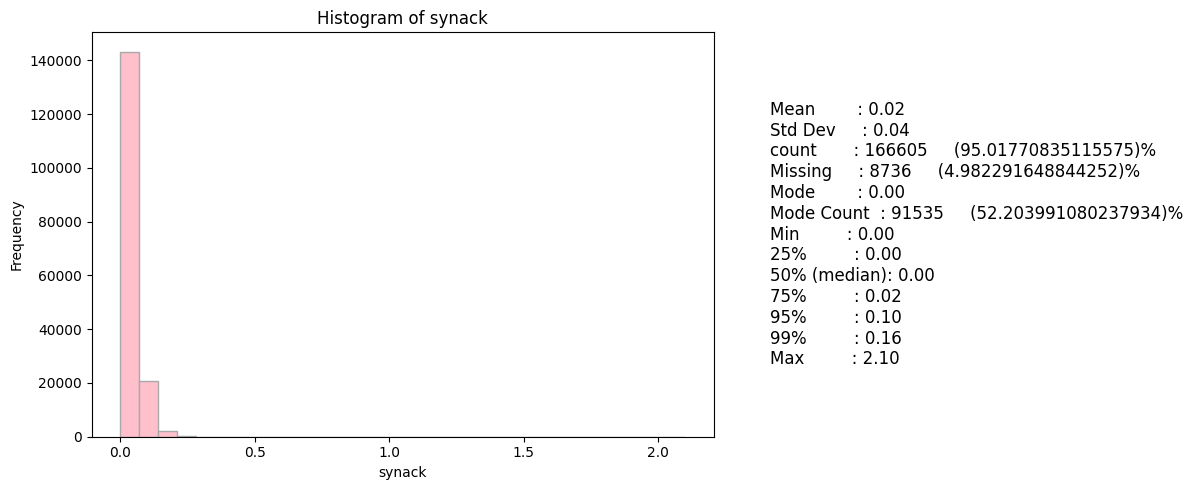

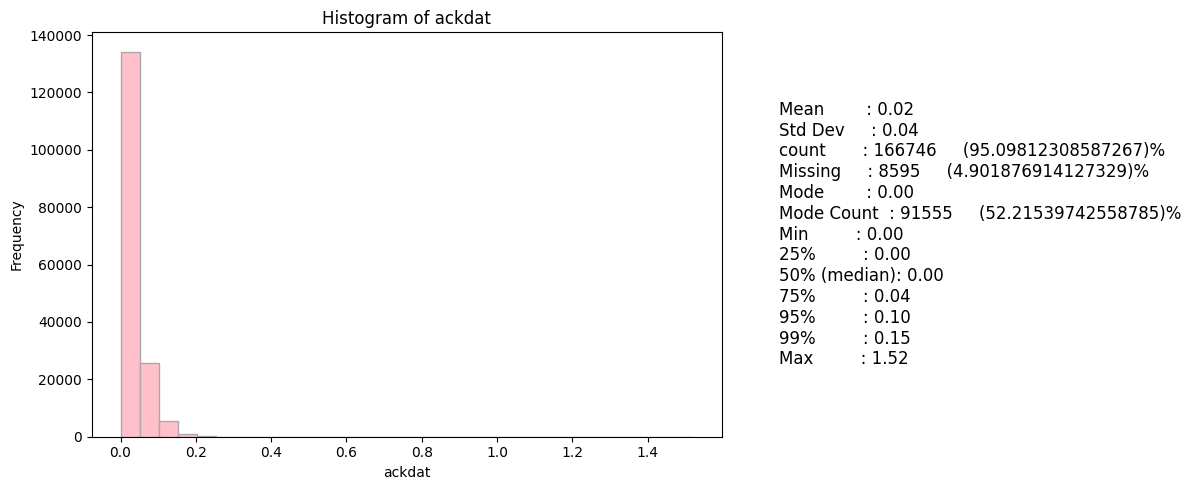

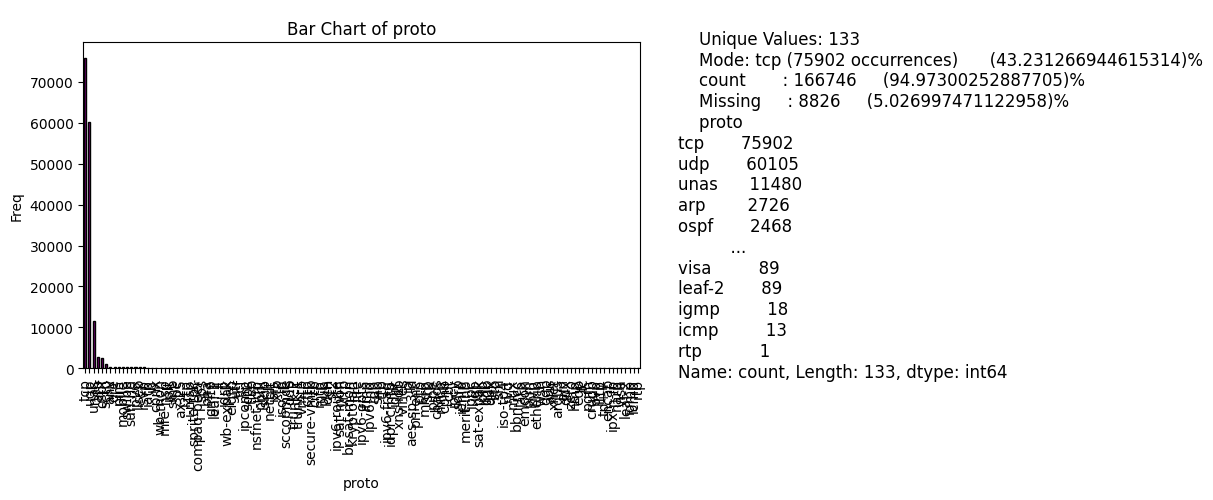

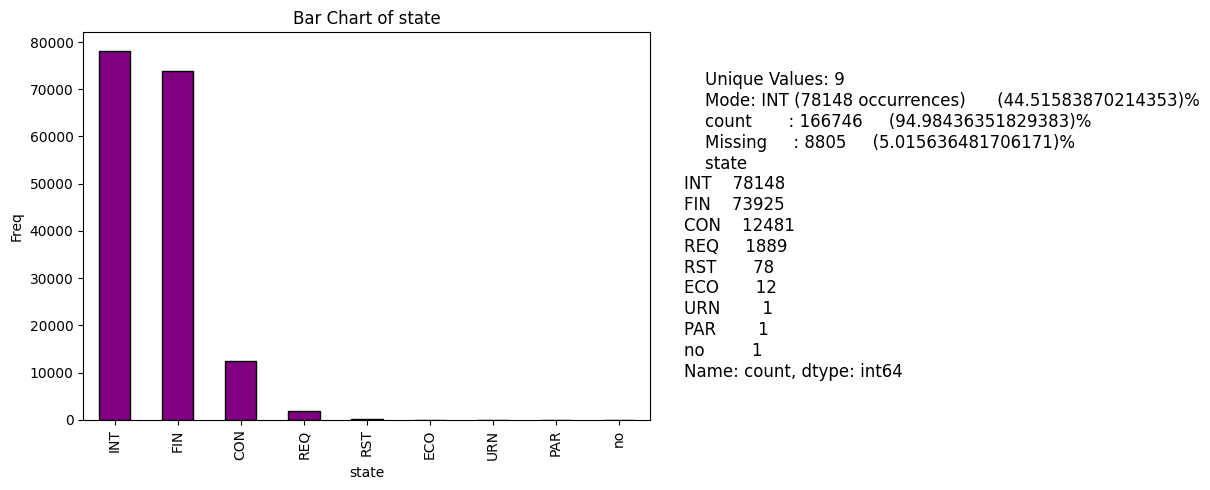

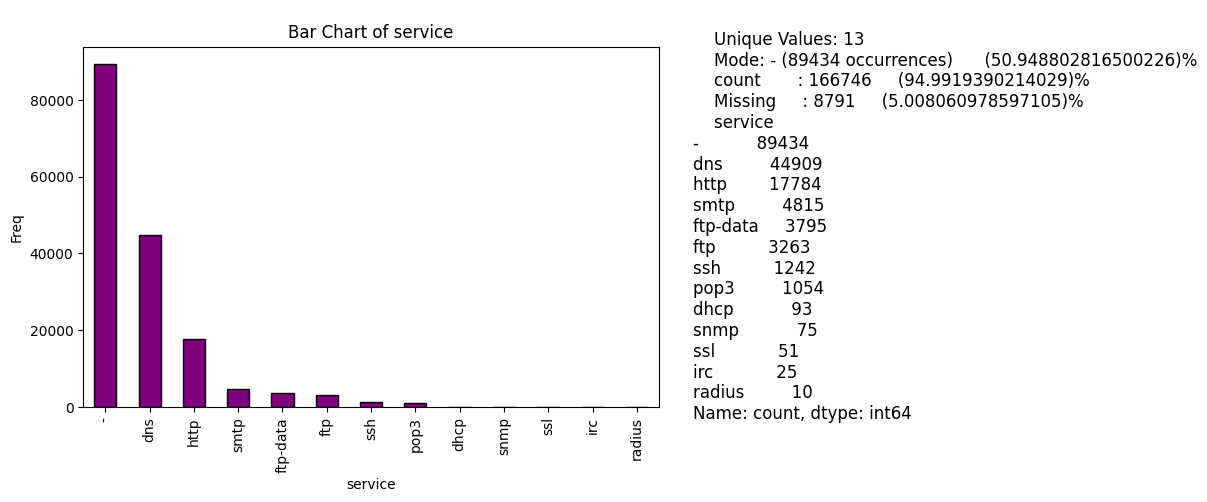

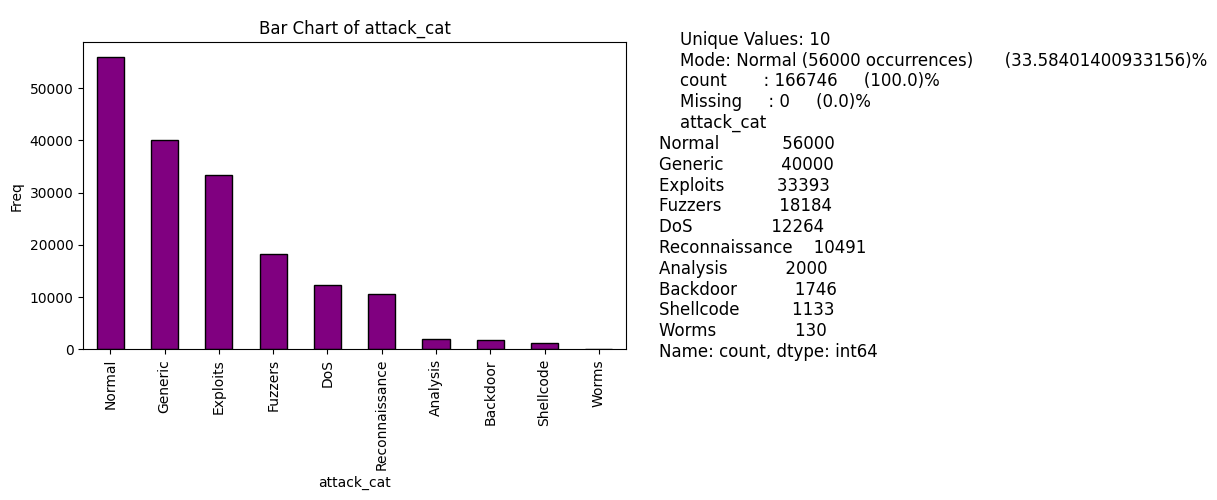

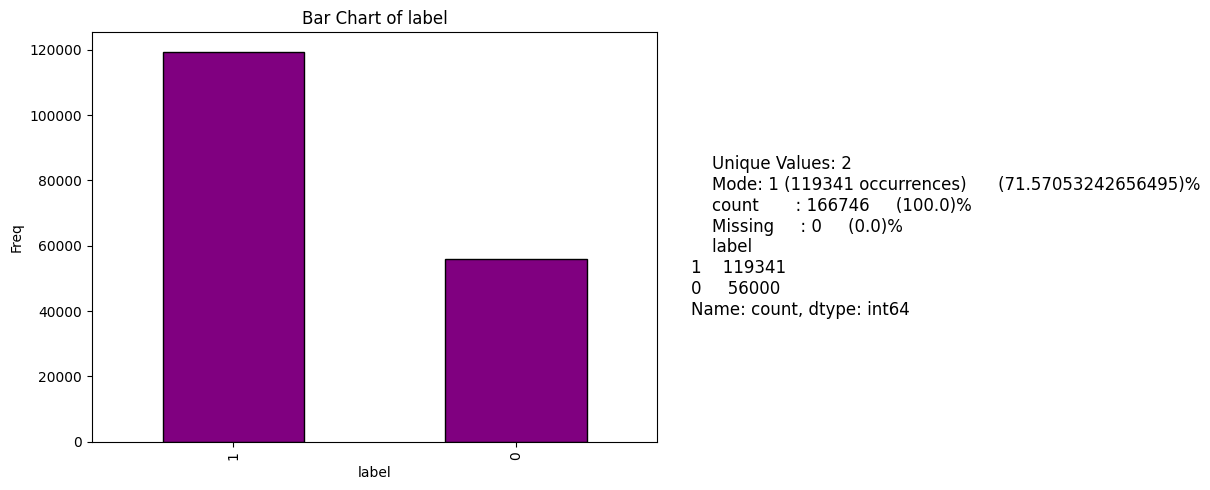

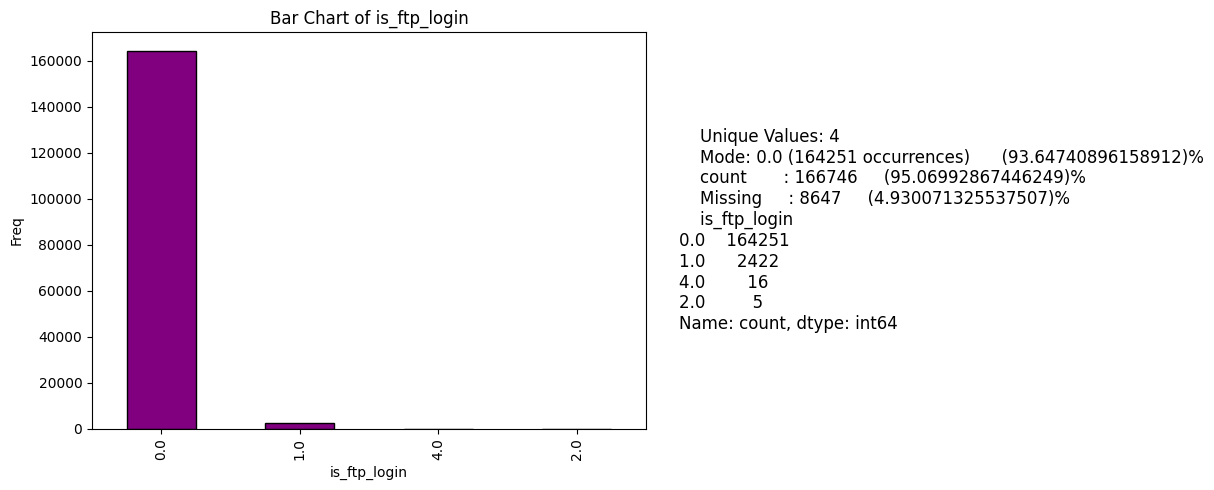

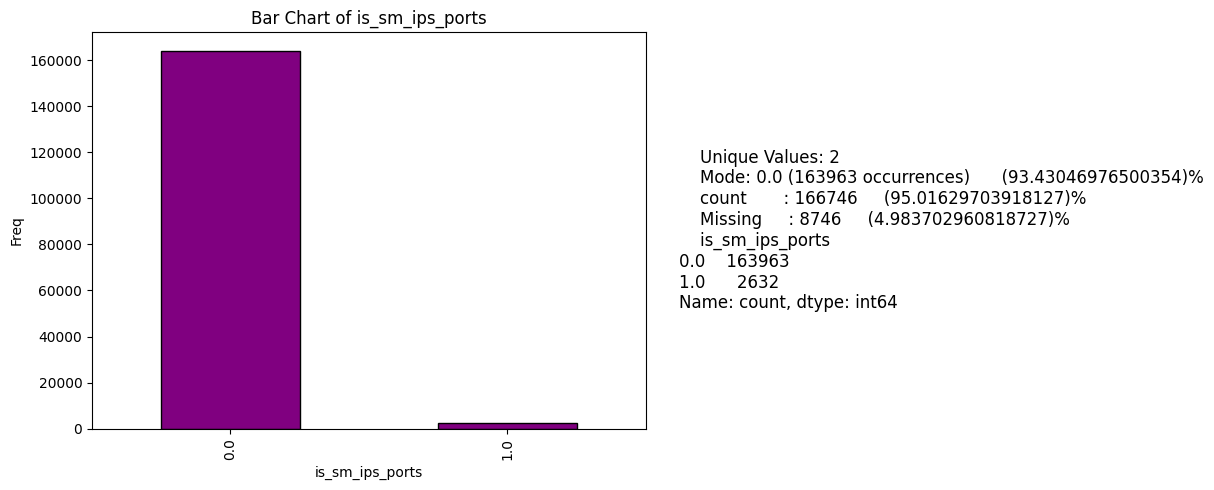

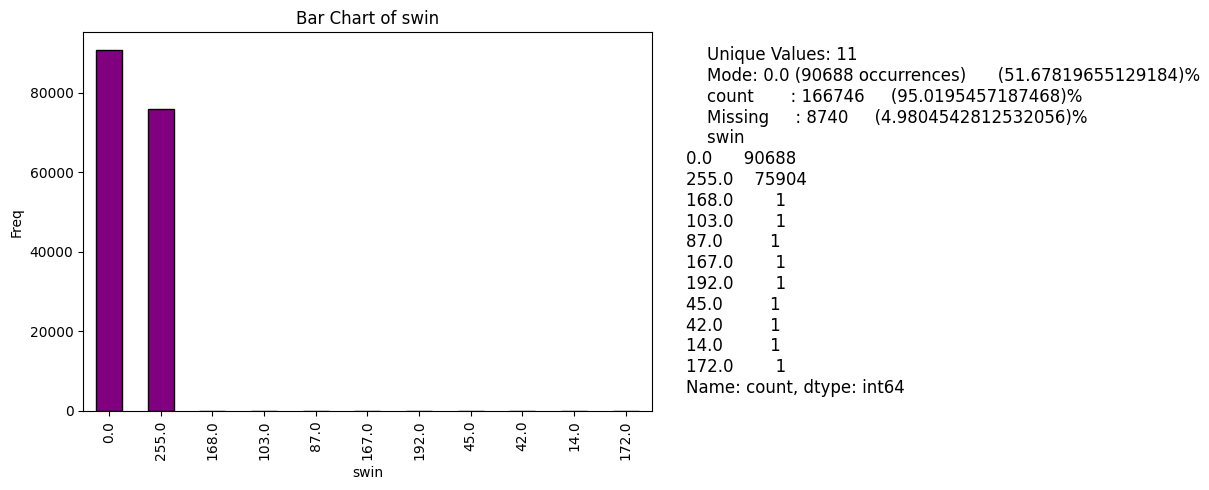

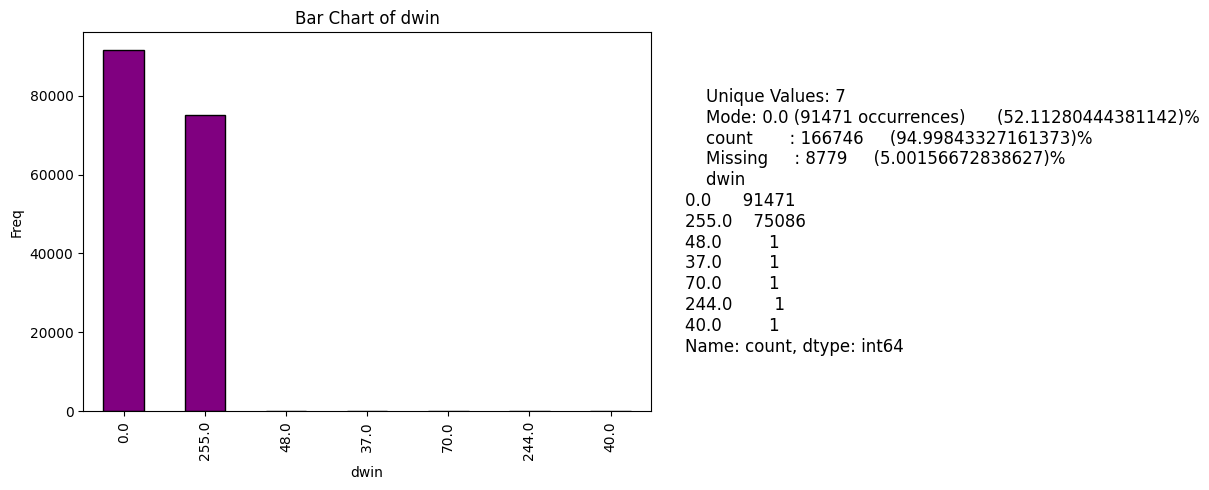

In [ ]:
# Histogram and Bar Chart
for column in Numerical_Columns:
    count = df[column].notna().sum()
    mean = df[column].mean()
    std = df[column].std()
    min_val = df[column].min()
    max_val = df[column].max()
    mode = df[column].mode()[0] if not df[column].mode().empty else None
    mode_count = (df[column] == mode).sum()
    missing_count = df[column].isna().sum()
    twentyfive_percent = df[column].quantile(0.25)
    median = df[column].quantile(0.5)
    seventyfive_percent = df[column].quantile(0.75)
    ninetyfive_percent = df[column].quantile(0.95)
    ninetynine_percent = df[column].quantile(0.99)

    fig, ax = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [3, 1]})

    df[column].plot.hist(ax=ax[0], bins=30, color='pink', edgecolor='darkgray', title=f"Histogram of {column}")
    ax[0].set_xlabel(column)
    ax[0].set_ylabel('Frequency')

    stats = f"""
    Mean        : {mean:.2f}
    Std Dev     : {std:.2f}
    count       : {count}     ({(count*100/(missing_count+count))})%
    Missing     : {missing_count}     ({(missing_count*100/(missing_count+count))})%
    Mode        : {mode:.2f}
    Mode Count  : {mode_count}     ({(mode_count*100/(missing_count+count))})%
    Min         : {min_val:.2f}
    25%         : {twentyfive_percent:.2f}
    50% (median): {median:.2f}
    75%         : {seventyfive_percent:.2f}
    95%         : {ninetyfive_percent:.2f}
    99%         : {ninetynine_percent:.2f}
    Max         : {max_val:.2f}
    """
    ax[1].axis('off')
    ax[1].text(0.1, 0.5, stats, fontsize=12, verticalalignment='center')

    plt.tight_layout()
    plt.show()

for column in Categorical_Columns:
    total_count = df[column].notna().sum()
    unique_values = df[column].nunique()
    unique_values_count = df[column].value_counts()
    missing_count = df[column].isna().sum()
    most_common = df[column].mode()[0] if not df[column].mode().empty else None
    most_common_count = df[column].value_counts().max()

    fig, ax = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [3, 1]})

    df[column].value_counts().plot.bar(ax=ax[0], color='purple', edgecolor='black', title=f"Bar Chart of {column}")
    ax[0].set_xlabel(column)
    ax[0].set_ylabel('Freq')

    info = f"""
    Unique Values: {unique_values}
    Mode: {most_common} ({most_common_count} occurrences)      ({(most_common_count*100/(missing_count+count))})%
    count       : {count}     ({(count*100/(missing_count+count))})%
    Missing     : {missing_count}     ({(missing_count*100/(missing_count+count))})%
    {unique_values_count}
    """
    ax[1].axis('off')
    ax[1].text(0.1, 0.5, info, fontsize=12, verticalalignment='center')

    plt.tight_layout()
    plt.show()

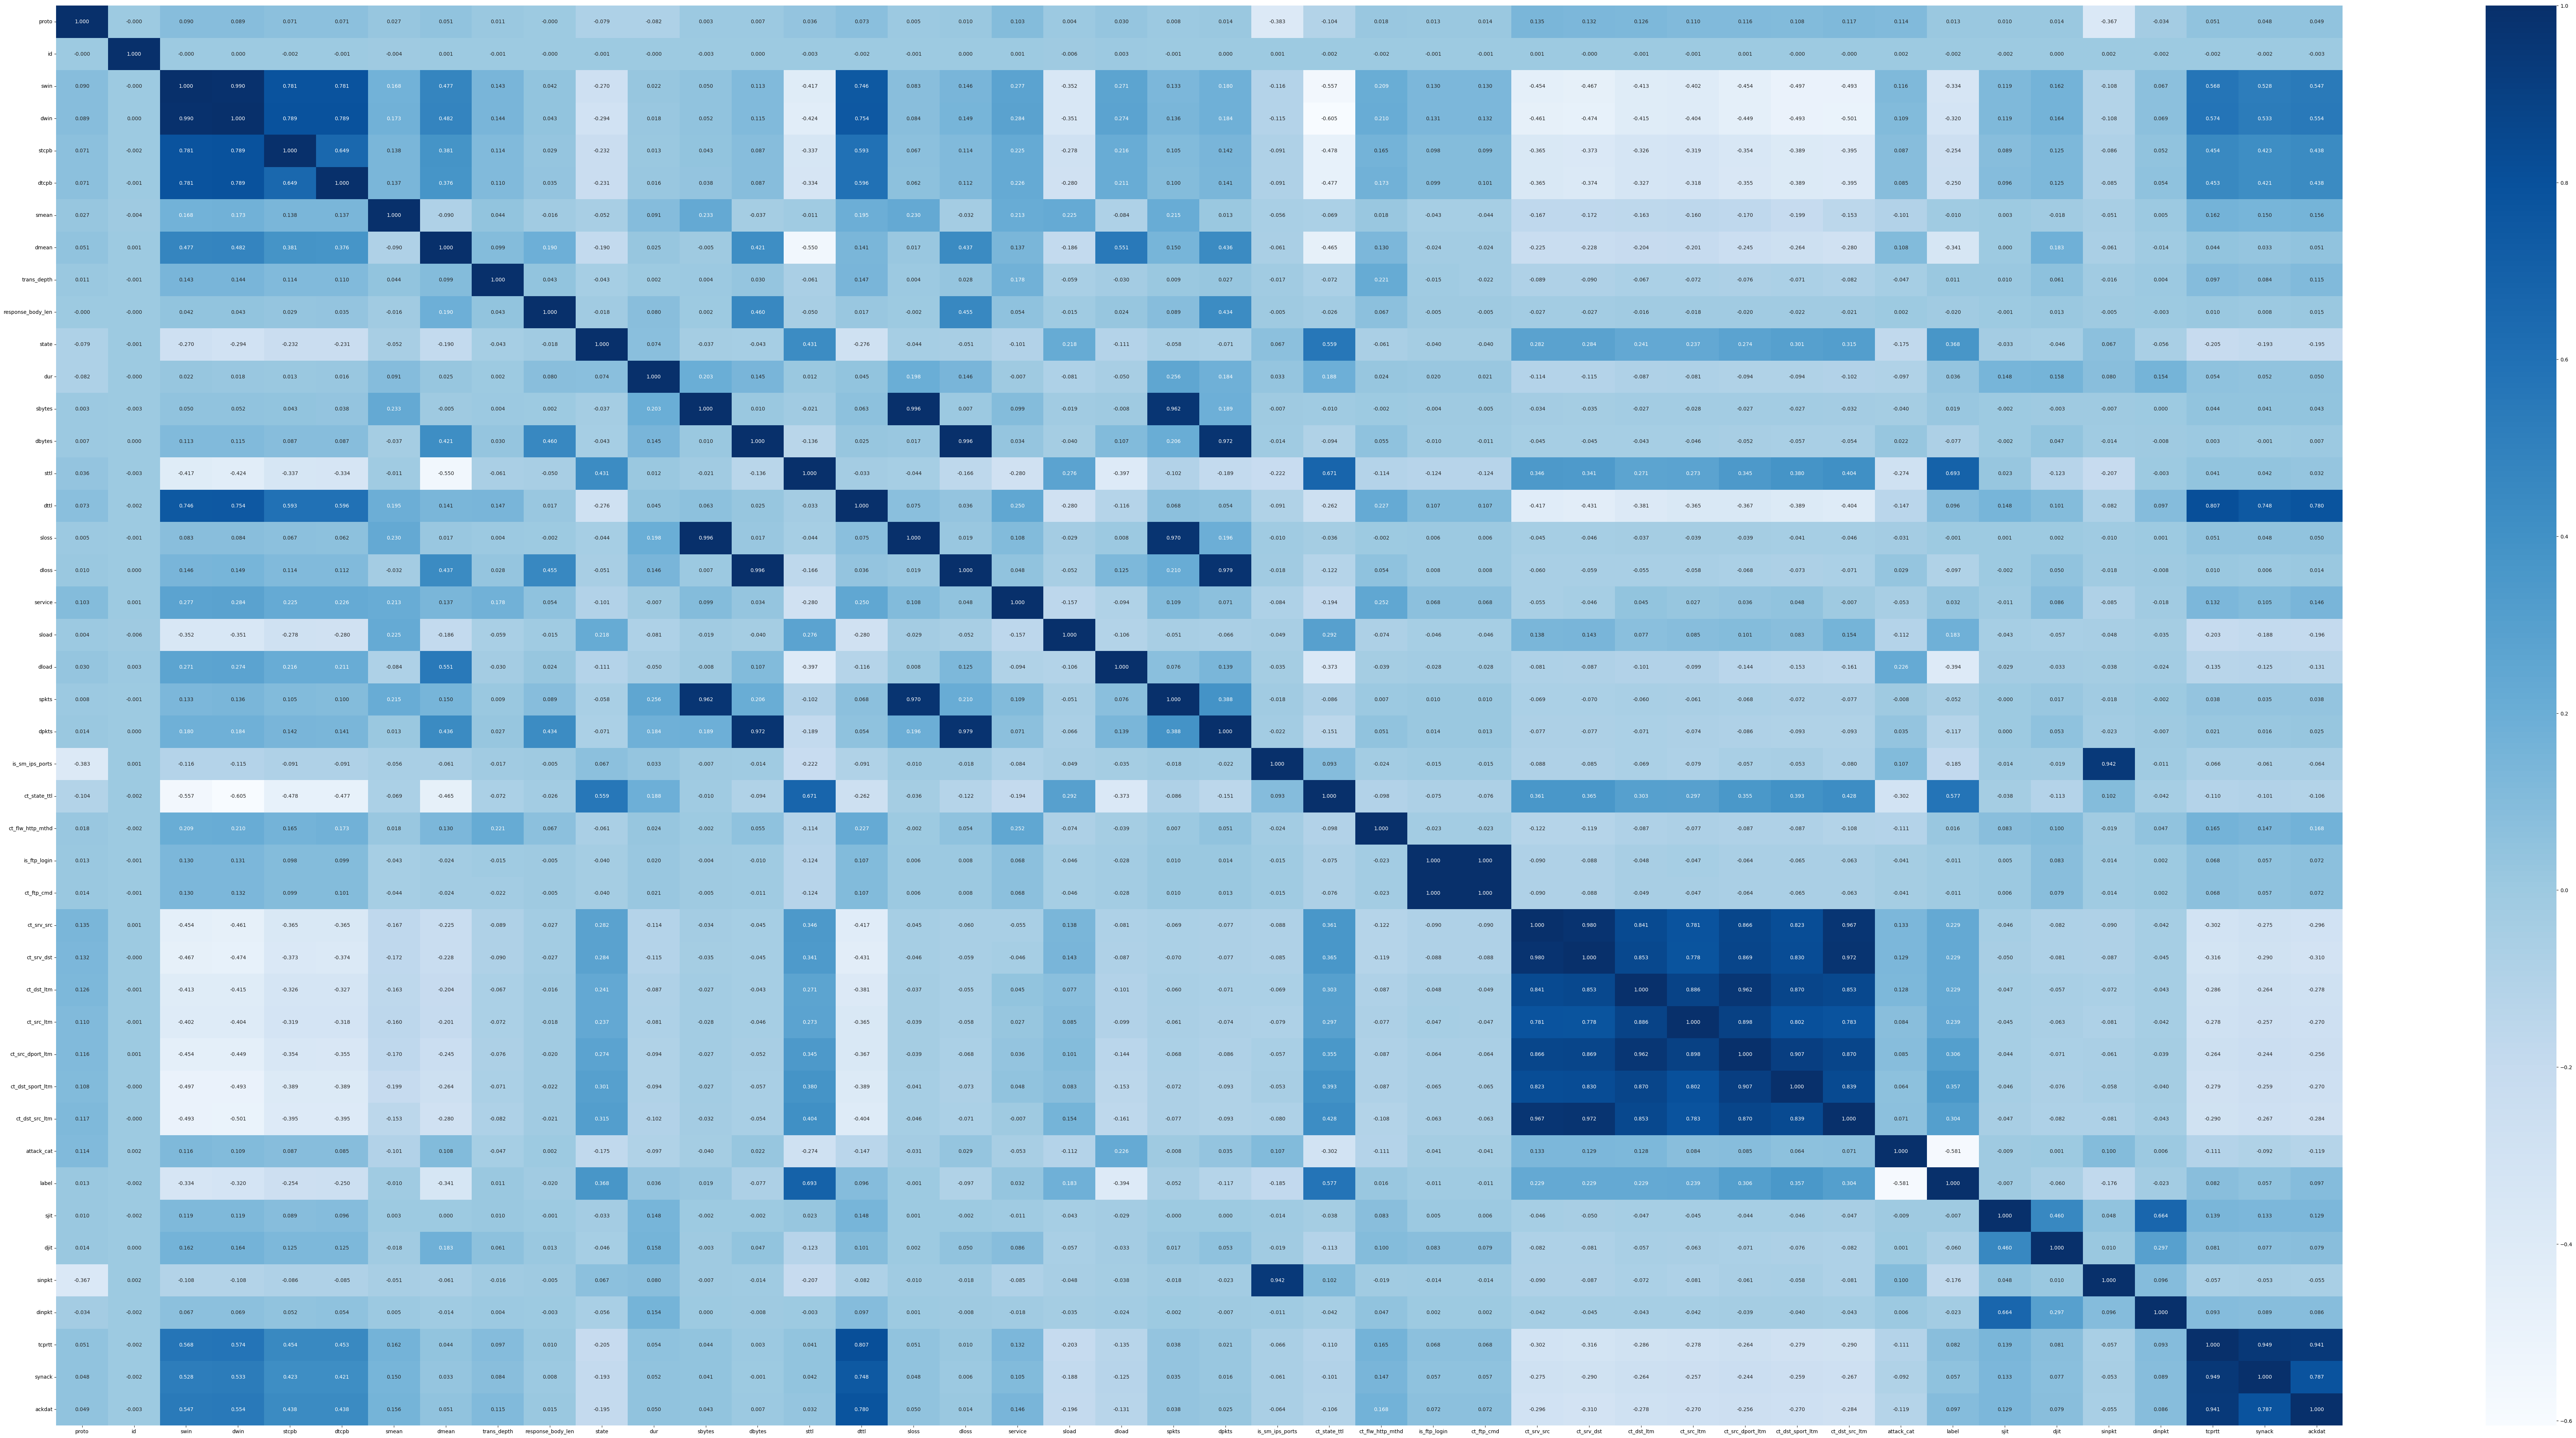

In [ ]:
df_all_numeric = df.copy()

pure_cat_col = df.select_dtypes(include=['object']).columns.tolist()

for col in pure_cat_col:
  df_all_numeric[col] = df_all_numeric[col].astype('category').cat.codes

corr = df_all_numeric.corr()
fig=plt.figure(figsize=(100,50))
heatmap = sns.heatmap(corr,annot=True,fmt=".3f", cmap="Blues")

# 1. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission.

In [ ]:
train_set, val_set = train_test_split(df, test_size=0.2, random_state=88, stratify=df['attack_cat'])

\# 2. Data Cleaning

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

We will give some common methods for you to try, but you only have to **at least implement one method for each process**. For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

# A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

### I. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

In [ ]:
def lama_imputer(df, n_neighbors=200, weights='uniform'):

  knn_imputer = KNNImputer(n_neighbors=n_neighbors, weights=weights)
  df[Numerical_Columns] = knn_imputer.fit_transform(df[Numerical_Columns])

  simple_imputer = SimpleImputer(strategy='most_frequent')
  df[Categorical_Columns] = simple_imputer.fit_transform(df[Categorical_Columns])

  return df

def gk_lama_imputer(df):

  numeric_imputer = SimpleImputer(strategy='mean')
  categorical_imputer = SimpleImputer(strategy='most_frequent')

  df[Numerical_Columns] = numeric_imputer.fit_transform(df[Numerical_Columns])
  df[Categorical_Columns] = categorical_imputer.fit_transform(df[Categorical_Columns])

  return df



In [ ]:
# RESULT OF FUNCTION ABOVE
df_copy = df.copy()
imputed_df = gk_lama_imputer(df_copy)

sum_null_before = 0
for col in df.columns.tolist():
  sum_null_before += df[col].isna().sum()

sum_null_after = 0
for col in df.columns.tolist():
  sum_null_after += imputed_df[col].isna().sum()

print("JUMLAH NULL SEBELUM: ", sum_null_before)
print("JUMLAH NULL SEKARANG: ", sum_null_after) #SEHARUSNYA 0

JUMLAH NULL SEBELUM:  359354
JUMLAH NULL SEKARANG:  0


### II. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. **Imputation**: Replace with mean, median, or a boundary value.
2. **Clipping**: Cap values to upper and lower limits.
3. **Transformation**: Use log, square root, or power transformations to reduce their influence.
4. **Model-Based**: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).

In [ ]:
def remove_outliers_num(df_real, num_cols, lower_percentile=0, upper_percentile=0.99):

  df = df_real.copy()

  mask = pd.Series(True, index=df.index)

  for col in num_cols:
      lower_limit = df[col].quantile(lower_percentile)
      upper_limit = df[col].quantile(upper_percentile)
      mask &= ((df[col].isna()) | ((df[col] >= lower_limit) & (df[col] <= upper_limit)))

  return df[mask]

def remove_outliers_cat(df_real, cat_cols):

  df = df_real.copy()

  for col in cat_cols:
    most_common = df[col].value_counts().nlargest(2).index
    df_cleaned = df[df[col].isin(most_common)]

  return df


def remove_outliers(df_real, rightmost_percent=0.01):

  df = df_real.copy()

  rightmost_columns = [
      "trans_depth", "response_body_len", "sbytes", "dbytes", "sloss",
      "dloss", "sjit", "djit", "sinpkt", "dinpkt"
  ]
  most_common_columns = ["is_ftp_login", "swin", "dwin"]

  df_cleaned_col = remove_outliers_cat(df, most_common_columns)

  df_cleaned = remove_outliers_num(df_cleaned_col, rightmost_columns)



  return df_cleaned


In [ ]:
#RESULT OF FUNCTION ABOVE
df_copy = df.copy()
print(df_copy.shape)
df_result = remove_outliers(df_copy)
print(df_result.shape)

(175341, 44)
(166231, 44)


### III. Remove Duplicates
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

In [ ]:
def remove_duplicates(df):
  result = df.drop_duplicates()
  return df

### IV. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

In [ ]:
def remove_columns(df_real):
  df = df_real.copy()

  # abs_corr = corr.abs()
  # upper_triangle = np.triu(np.ones(abs_corr.shape), k=1)
  # high_corr_pairs = [
  #     (abs_corr.index[i], abs_corr.columns[j])
  #     for i, j in zip(*np.where((abs_corr > 0.9) & (upper_triangle == 1)))
  # ]

  # groups = []
  # seen = set()

  # for f1, f2 in high_corr_pairs:
  #     if f1 not in seen and f2 not in seen:
  #         groups.append({f1, f2})
  #         seen.update({f1, f2})
  #     else:
  #         for group in groups:
  #             if f1 in group or f2 in group:
  #                 group.update({f1, f2})
  #                 seen.update({f1, f2})
  #                 break

  # groups = [list(group) for group in groups]

  # target_correlations = abs_corr['attack_cat']


  # columns_to_drop = []

  # for group in groups:
  #   lowest_corr_column = target_correlations[group].idxmin()
  #   columns_to_drop.append(lowest_corr_column)

  # df = df.drop(columns=columns_to_drop)


  # columns_to_keep = []

  # for group in groups:
  #   highest_corr_column = target_correlations[group].idxmax()
  #   columns_to_keep.append(highest_corr_column)

  # ungrouped_columns = [
  #     col for col in abs_corr.columns if col not in seen and col != 'attack_cat'
  # ]
  # columns_to_keep.extend(ungrouped_columns)
  # columns_to_keep.append('attack_cat')

  # df = df[columns_to_keep]

  return df.drop('label', axis = 1)

# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [ ]:
# from sklearn.pipeline import Pipeline

# # Note: You can add or delete preprocessing components from this pipeline

# pipe = Pipeline([("imputer", FeatureImputer()),
#                  ("featurecreator", FeatureCreator()),
#                  ("scaler", FeatureScaler()),
#                  ("encoder", FeatureEncoder())])

# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

In [ ]:
# # Your code should work up until this point
# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

or create your own here

In [ ]:
# Write your code here
def clean_data(df_real):

  df = df_real.copy()

  df = gk_lama_imputer(df)
  df = remove_outliers(df)
  df = remove_duplicates(df)
  df = remove_columns(df)

  return df

print(train_set.dtypes)

proto                 object
id                     int64
swin                 float64
dwin                 float64
stcpb                float64
dtcpb                float64
smean                float64
dmean                float64
trans_depth          float64
response_body_len    float64
state                 object
dur                  float64
sbytes               float64
dbytes               float64
sttl                 float64
dttl                 float64
sloss                float64
dloss                float64
service               object
sload                float64
dload                float64
spkts                float64
dpkts                float64
is_sm_ips_ports      float64
ct_state_ttl         float64
ct_flw_http_mthd     float64
is_ftp_login         float64
ct_ftp_cmd           float64
ct_srv_src           float64
ct_srv_dst           float64
ct_dst_ltm           float64
ct_src_ltm           float64
ct_src_dport_ltm     float64
ct_dst_sport_ltm     float64
ct_dst_src_ltm

In [ ]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import LabelEncoder
import json

def pipeliner(model):
  train_set_clean = clean_data(train_set)
  val_set_clean = clean_data(val_set)

  Categorical_Columns_for_Pipelining = train_set_clean.select_dtypes(include=['object', 'bool']).columns.tolist()
  Numerical_Columns_for_Pipelining = train_set_clean.select_dtypes(include=['int64','float64']).columns.tolist()

  Categorical_Columns_for_Pipelining = [col for col in Categorical_Columns_for_Pipelining if col not in ["attack_cat", "id", "label"]]
  Numerical_Columns_for_Pipelining = [col for col in Numerical_Columns_for_Pipelining if col not in ["attack_cat", "id", "label"]]

  numerical_transformer = Pipeline(steps=[
    ('scaler', PowerTransformer(method='yeo-johnson')),
    ('pca', PCA(n_components=Numerical_Columns_for_Pipelining.__len__()))
  ])

  categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
  ])

  preprocessor = ColumnTransformer(
    transformers=[
      ('num', numerical_transformer, Numerical_Columns_for_Pipelining),
      ('cat', categorical_transformer, Categorical_Columns_for_Pipelining)
    ],
    remainder='passthrough'
  )


  pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])



  X_train = train_set_clean.drop('attack_cat', axis=1)
  y_train = train_set_clean['attack_cat']

  X_val = val_set_clean.drop('attack_cat', axis=1)
  y_val = val_set_clean['attack_cat']

  label_encoder = LabelEncoder()
  y_train = label_encoder.fit_transform(y_train)
  y_val = label_encoder.transform(y_val)

  pipeline.fit(X_train, y_train)
  y_pred = pipeline.predict(X_val)

  print("Validation Accuracy:", accuracy_score(y_val, y_pred))

# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `attack_cat`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

## A. KNN

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist
import json

class KNN():
    # Initialise
    def __init__(self, n_neighbors=5, metric='euclidean'):
        self.n_neighbors = n_neighbors
        self.metric = metric

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        preds = []
        for test_row in X_test:
            nearest_neighbours = self.get_neighbours(test_row)
            unique, counts = np.unique(nearest_neighbours, return_counts=True)
            majority = unique[np.argmax(counts)]
            preds.append(majority)
        return np.array(preds)

    def get_neighbours(self, test_row):
        distances = list()

        for (train_row, train_class) in zip(self.X_train, self.y_train):
            if self.metric == 'euclidean':
                dist = np.sqrt(np.sum((train_row-test_row)**2))
            elif self.metric == 'manhattan':
                np.sum(np.abs(train_row-test_row))
            elif self.metric == 'minkowski':
                np.sum(np.abs(train_row-test_row)**self.p)**(1/self.p)
            else:
                raise NameError('Parameter metrics should be euclidean, manhattan and minkowski')
            distances.append((dist, train_class))

        distances.sort(key=lambda x: x[0])

        neighbours = list()
        for i in range(self.k):
            neighbours.append(distances[i][1])

        return neighbours

    def save_to_file(self, filename):
        model_data = {
            'n_neighbors': self.n_neighbors,
            'metric': self.metric,
            'X_train': self.X_train.tolist(),
            'y_train': self.y_train.tolist()
        }
        with open(filename, 'w') as f:
            json.dump(model_data, f)
        print(f"Model saved to {filename}")

    def load_from_file(self, filename):
        with open(filename, 'r') as f:
            model_data = json.load(f)
        self.n_neighbors = model_data['n_neighbors']
        self.metric = model_data['metric']
        self.X_train = np.array(model_data['X_train'])
        self.y_train = np.array(model_data['y_train'])
        print(f"Model loaded from {filename}")
        return self


model = KNN(n_neighbors=5, metric='euclidean')

pipeliner(model)


{'dloss', 'ct_dst_src_ltm', 'synack', 'spkts'}
(132685, 40)
{'dloss', 'ct_dst_src_ltm', 'synack', 'spkts'}
(33178, 40)


AttributeError: 'KNN' object has no attribute 'k'

In [ ]:
#LAMA BANGET
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5, weights='distance')
# Uncomment kalo mau dirun, ini lama bgt
# pipeliner(model)


## B. Naive Bayes

In [ ]:
class NaiveBayes():
    def __init__(self):
        self.classes = None
        self.class_mean = {}
        self.class_var = {}
        self.class_prior = {}

    def fit(self, X_train, y_train):
        self.classes = np.unique(y_train)

        for c in self.classes:
            X_c = X_train[y_train == c]

            self.class_mean[c] = X_c.mean(axis=0)
            self.class_var[c] = X_c.var(axis=0) + 1e-9
            self.class_prior[c] = X_c.shape[0] / X_train.shape[0]

    def predict(self, X_test):
        preds = []
        for test_row in X_test:
            posteriors = []
            for c in self.classes:
                prior_log = np.log(self.class_prior[c])
                likelihood_log = np.sum(np.log(self._gaussian_likelihood(test_row, c)))
                posterior = prior_log + likelihood_log
                posteriors.append(posterior)
            preds.append(self.classes[np.argmax(posteriors)])

        return np.array(preds)

    def _gaussian_likelihood(self, x, class_label):
        mean = self.class_mean[class_label]
        var = self.class_var[class_label]

        numerator = np.exp(-0.5 * ((x - mean) ** 2) / var)
        denominator = np.sqrt(2 * np.pi * var)

        return numerator / denominator

    def save_to_file(self, filename):
        with open(filename, 'wb') as f:
            pickle.dump(self, f)

    @staticmethod
    def load_from_file(filename):
        with open(filename, 'rb') as f:
            return pickle.load(f)

In [ ]:
model = NaiveBayes()
pipeliner(model)

{'synack', 'spkts', 'ct_dst_src_ltm', 'dloss'}
(132685, 40)
{'synack', 'spkts', 'ct_dst_src_ltm', 'dloss'}
(33178, 40)


<ipython-input-57-f8dc687ced5b>:24: RuntimeWarning: divide by zero encountered in log
  likelihood_log = np.sum(np.log(self._gaussian_likelihood(test_row, c)))


Validation Accuracy: 0.10943999035505456


In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
pipeliner(model)

Validation Accuracy: 0.6133883898969197


In [ ]:
model = NaiveBayes()
model.save_to_file('test_nb.pkl')

In [ ]:
mdl = NaiveBayes.load_from_file('test_nb.pkl')
pipeliner(mdl)

{'synack', 'spkts', 'ct_dst_src_ltm', 'dloss'}
(132685, 40)
{'synack', 'spkts', 'ct_dst_src_ltm', 'dloss'}
(33178, 40)


<ipython-input-61-78a476247eee>:24: RuntimeWarning: divide by zero encountered in log
  likelihood_log = np.sum(np.log(self._gaussian_likelihood(test_row, c)))


Validation Accuracy: 0.10943999035505456


## C. ID3

In [ ]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, ClassifierMixin
import json

class ID3(BaseEstimator, ClassifierMixin):
    def __init__(self, max_depth=None):
        self.tree = None
        self.max_depth = max_depth

    def build_tree(self, X, y, feature_names, depth=0):
        # Stopping condition
        if len(np.unique(y)) == 1 or (self.max_depth is not None and depth >= self.max_depth):
            return np.bincount(y).argmax()

        if X.shape[1] == 0:
            return np.bincount(y).argmax()

        # Find the best feature to split on
        best_feature_index, best_threshold = self.best_split(X, y)
        best_feature_name = feature_names[best_feature_index]

        if best_threshold is not None:
            best_feature_name = f"{best_feature_name} <= {best_threshold}"

        tree = {best_feature_name: {}}

        # Handle splitting for numerical or categorical features
        if best_threshold is None:
            feature_values = np.unique(X[:, best_feature_index])
            for value in feature_values:
                indices = X[:, best_feature_index] == value
                subtree = self.build_tree(
                    np.delete(X[indices], best_feature_index, axis=1),
                    y[indices],
                    [name for i, name in enumerate(feature_names) if i != best_feature_index],
                    depth + 1
                )
                tree[best_feature_name][value] = subtree
        else:
            # Numerical split: create <= threshold and > threshold branches
            left_indices = X[:, best_feature_index] <= best_threshold
            right_indices = X[:, best_feature_index] > best_threshold

            subtree_left = self.build_tree(
                np.delete(X[left_indices], best_feature_index, axis=1),
                y[left_indices],
                [name for i, name in enumerate(feature_names) if i != best_feature_index],
                depth + 1
            )
            subtree_right = self.build_tree(
                np.delete(X[right_indices], best_feature_index, axis=1),
                y[right_indices],
                [name for i, name in enumerate(feature_names) if i != best_feature_index],
                depth + 1
            )

            tree[best_feature_name]["Yes"] = subtree_left
            tree[best_feature_name]["No"] = subtree_right

        return tree

    def entropy(self, y):
        _, y = np.unique(y, return_inverse=True)
        counts = np.bincount(y)
        probabilities = counts / len(y)
        return -np.sum(probabilities * np.log2(probabilities + 1e-9))

    def information_gain(self, X, y, feature_index, threshold=None):
        total_entropy = self.entropy(y)

        # Split on threshold if provided
        if threshold is None:
            values, counts = np.unique(X[:, feature_index], return_counts=True)
            weighted_entropy = 0
            for i, value in enumerate(values):
                subset_y = y[X[:, feature_index] == value]
                weighted_entropy += (counts[i] / len(y)) * self.entropy(subset_y)
        else:
            # Binary split for numerical feature
            left_indices = X[:, feature_index] <= threshold
            right_indices = X[:, feature_index] > threshold

            left_entropy = self.entropy(y[left_indices]) if np.any(left_indices) else 0
            right_entropy = self.entropy(y[right_indices]) if np.any(right_indices) else 0

            left_weight = np.sum(left_indices) / len(y)
            right_weight = np.sum(right_indices) / len(y)

            weighted_entropy = left_weight * left_entropy + right_weight * right_entropy

        return total_entropy - weighted_entropy

    def best_split(self, X, y):
        best_feature = None
        best_gain = -np.inf
        best_threshold = None

        for feature_index in range(X.shape[1]):
            if np.issubdtype(X[:, feature_index].dtype, np.number):  # Numerical feature
                thresholds = np.unique(X[:, feature_index])
                for threshold in thresholds:
                    gain = self.information_gain(X, y, feature_index, threshold)
                    if gain > best_gain:
                        best_gain = gain
                        best_feature = feature_index
                        best_threshold = threshold
            else:  # Categorical feature
                gain = self.information_gain(X, y, feature_index)
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature_index
                    best_threshold = None

        return best_feature, best_threshold

    def fit(self, X, y):
        if isinstance(X, pd.DataFrame):
            feature_names = X.columns.tolist()
        else:
            feature_names = [str(i) for i in range(X.shape[1])]

        X = np.array(X)
        y = np.array(y)
        self.tree = self.build_tree(X, y, feature_names)
        return self

    def predict_instance(self, instance, tree):
        if not isinstance(tree, dict):
            return tree
        feature = next(iter(tree))
        feature_name, threshold = feature.split(" <= ") if " <= " in feature else (feature, None)
        feature_value = instance[feature_name] if isinstance(instance, pd.Series) else instance[int(feature_name)]

        if threshold is not None:
            threshold = float(threshold)
            branch = "Yes" if feature_value <= threshold else "No"
        else:
            branch = feature_value

        if branch not in tree[feature]:
            return None  # Handle unseen feature values
        return self.predict_instance(instance, tree[feature][branch])

    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            predictions = [self.predict_instance(row, self.tree) for _, row in X.iterrows()]
        else:
            predictions = [self.predict_instance(row, self.tree) for row in X]
        return np.array(predictions)


    def save_to_file(self, filename):
        if self.tree is None:
            raise ValueError("Model is not trained yet.")
        with open(filename, 'w') as f:
            json.dump(self.tree, f)
        print(f"Model saved to {filename}")

    def load_from_file(self, filename):
        with open(filename, 'r') as f:
            self.tree = json.load(f)
        print(f"Model loaded from {filename}")
        return self


model = ID3(max_depth=5)
pipeliner(model)



In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy')
pipeliner(model)

## D. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

In [ ]:
# Type your code here

## E. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `attack_cat` column.

In [ ]:
# Type your code here

# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- etc...

# Should we impute or drop missing data?

Imputing or dropping missing data depends on the impact of missingness. For this analysis, data cleaning in the pipeline with imputing likely improved performance, as completely removing data might have caused a loss of valuable information in already limited samples. Imputation is especially beneficial for logistic regression and SVM, which rely on a well-distributed feature space.

The use of mean/mode imputation (SimpleImputer) ensured that the dataset retained as much information as possible. Missing values in numerical features were imputed with the mean, while categorical features were imputed with the most frequent category, preserving the distribution of the data.

# Does feature scaling help improve model performance?
Feature scaling prove to be quite critical to the performance of SVM, Logistic Regression, and KNN, hence the log loss results being significantly higher than other algorithms.

StandardScaler was used to normalize numerical features. Feature scaling ensured that models sensitive to magnitude differences (e.g., KNN, SVM) operated effectively, avoiding dominance of features with large scales.

# Some insights from EDA and Preprocessing
This lab work has shown that machine learning is simply not just model training using data, but that exploratory data analysis and data preprocessing is a very vital and important part in model training. Some insights and conclusions that could be taken from the model trainings that have been executed above are as follows:

* EDA: Visualizations like KDE plots and count plots helped uncover distributions, outliers, and missing values. Identifying these characteristics guided preprocessing steps, such as handling outliers and imputation.
* Handling Outliers: Replacing extreme values with the median prevented these data from lowering the quality of models that calculate on data distances.
* Removing Duplicates: Ensured no bias from repeated instances.